In [245]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns',100)

# Step 1: Importing the data

In [246]:
df=pd.read_csv('Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

# STEP 2: Checking the structure of the data

In [247]:
df.shape

(9240, 37)

In [248]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [249]:
#Finding the unique values
df.nunique().sort_values(ascending = False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
How did you hear about X Education                 10
City                                                7
Lead Profile                                        6
What is your current occupation                     6
Lead Quality                                        5
Lead Origin                 

In [250]:
#missing_value is outputting the total number of missing values and Percentage of missing values.
def missing_value(value):
    total=value.isnull().sum().sort_values(ascending=False)
    percentage=(value.isnull().sum()/value.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [251]:
missing_value(df)

Total  Percentage
Lead Quality                                    4767   51.590909
Asymmetrique Profile Score                      4218   45.649351
Asymmetrique Activity Score                     4218   45.649351
Asymmetrique Profile Index                      4218   45.649351
Asymmetrique Activity Index                     4218   45.649351
Tags                                            3353   36.287879
What matters most to you in choosing a course   2709   29.318182
Lead Profile                                    2709   29.318182
What is your current occupation                 2690   29.112554
Country                                         2461   26.634199
How did you hear about X Education              2207   23.885281
Specialization                                  1438   15.562771
City                                            1420   15.367965
TotalVisits                                      137    1.482684
Page Views Per Visit                             137    1.482684
Last Activity                                    103    1.114719
Lead Source                                       36    0.389610
Do Not Email                                       0    0.000000
Do Not Call                                        0    0.000000
Converted                                          0    0.000000
Total Time Spent on Website                        0    0.000000
Lead Origin                                        0    0.000000
Lead Number                                        0    0.000000
Last Notable Activity                              0    0.000000
Newspaper Article                                  0    0.000000
Search                                             0    0.000000
Magazine                                           0    0.000000
A free copy of Mastering The Interview             0    0.000000
X Education Forums                                 0    0.000000
Newspaper                                          0    0.000000
Digital Advertisement                              0    0.000000
Through Recommendations                            0    0.000000
Receive More Updates About Our Courses             0    0.000000
Update me on Supply Chain Content                  0    0.000000
Get updates on DM Content                          0    0.000000
I agree to pay the amount through cheque           0    0.000000
Prospect ID                                        0    0.000000

# STEP 3: Data Exploration 
## Handling the missing values and dropping columns 

### Inspect the column wise NaN values, and take selective measures on dropping the columns based on the significance of the variable or by imputing the NaN value with the most appropriate value to avoid bias. 

In [252]:
df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [253]:
df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [254]:
df['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [255]:
df['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [256]:
#Contains one type of value
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [257]:
#Contains one type of value
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [258]:
#Contains one type of value
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [259]:
#Contains one type of value
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [260]:
#Can lead to bias view
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [261]:
#Can lead to bias view
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [262]:
#Can lead to bias view
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [263]:
#Can lead to bias view
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [264]:
#Can lead to bias view
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [265]:
#Contains one type of value
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [266]:
#Can lead to bias view
df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [267]:
#Contains one type of value
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [268]:
#contains a lot of missing values, Even if we replace the missing values with 'Better Career Prospects' it would lead to a 
#bias view
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [269]:
#cannot be used for building the model
df['Prospect ID'].value_counts().head()

4d0d7ff2-a458-4b09-80b4-a493efc9fba5    1
c92f7ee5-c9df-4d52-b49f-5517f27440b0    1
136cbe20-a749-429d-acdb-26df7d70fa5c    1
74eb6d25-0714-435f-b995-0e07bc9e16ae    1
15c2e7f4-a9ee-4fbf-81d6-9dfbc62c1e59    1
Name: Prospect ID, dtype: int64

In [270]:
df=df.drop(['Prospect ID','A free copy of Mastering The Interview','Get updates on DM Content',
            'Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations',
            'Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine','Search',
            'I agree to pay the amount through cheque','What matters most to you in choosing a course',
            'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index',
            'Asymmetrique Profile Score'],axis=1)

In [271]:
#Renaming the 'What is your current occupation' to 'Occupation'
df=df.rename(columns={'What is your current occupation':'Occupation'})

### These columns do not add much value into our model so they can be dropped. Some of them either contain just one value which cannot be of much use to us. Also the columns contain high number of missing values, imputing them with any value can make the analysis bias, Specially since the value of 'Asymmetrique Profile Score' and 'Asymmetrique Activity Score' is not categorical. It is best if we dropped these four columns.

### Since some of the values in the columns as 'select', meaning the user did not enter any value. We decided to mark them as empty.

In [272]:
df=df.replace('Select',np.nan)

### Inspecting the missing values

In [273]:
missing_value(df)

Total  Percentage
How did you hear about X Education   7250   78.463203
Lead Profile                         6855   74.188312
Lead Quality                         4767   51.590909
City                                 3669   39.707792
Specialization                       3380   36.580087
Tags                                 3353   36.287879
Occupation                           2690   29.112554
Country                              2461   26.634199
Page Views Per Visit                  137    1.482684
TotalVisits                           137    1.482684
Last Activity                         103    1.114719
Lead Source                            36    0.389610
Do Not Email                            0    0.000000
Lead Origin                             0    0.000000
Last Notable Activity                   0    0.000000
Do Not Call                             0    0.000000
Converted                               0    0.000000
Total Time Spent on Website             0    0.000000
Lead Number                             0    0.000000

### We have realized that the since putting 'Select' as missing values 'How did you hear about X Education' and 'Lead Profile' have a drastic increase the number of missing values. It is a good idea to drop them since they do not contribute to the model.¶

In [274]:
df=df.drop(['How did you hear about X Education','Lead Profile','Lead Number'],axis=1)

### Plotting all the categorical columns to have a better visualize the data

In [275]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'Occupation', 'Tags', 'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

### Dividing the columns into categorical and continuous categories and visualizing the graphs for both

In [276]:
cat_vars= ['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'Occupation','Tags',
           'Country','Lead Quality','City','Last Notable Activity','Do Not Email','Do Not Call']
cont_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

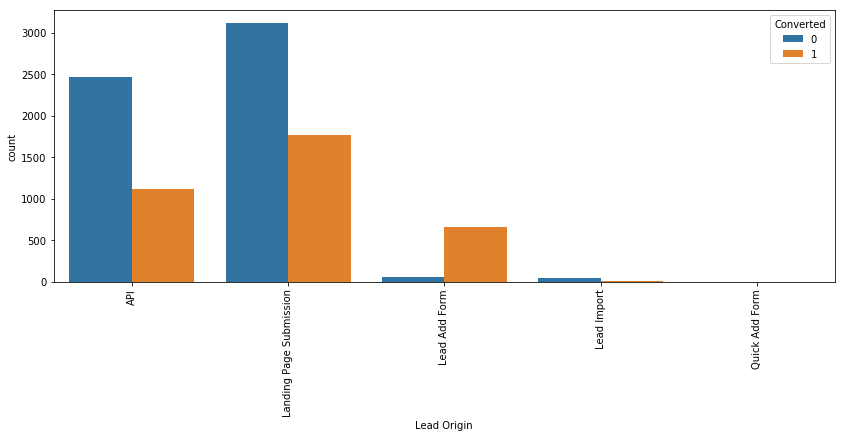

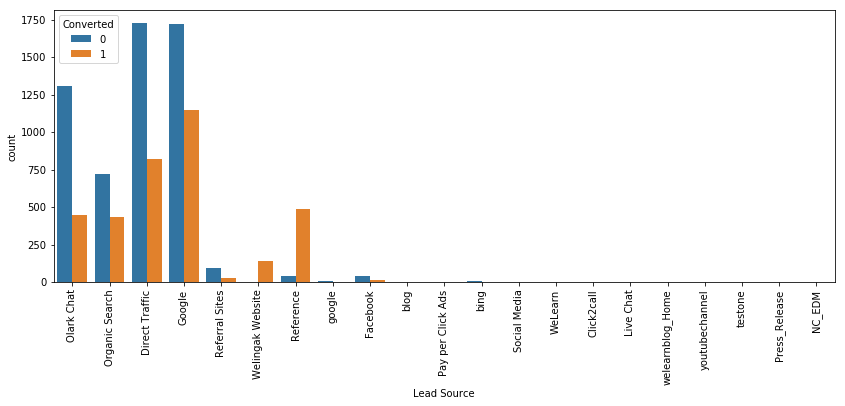

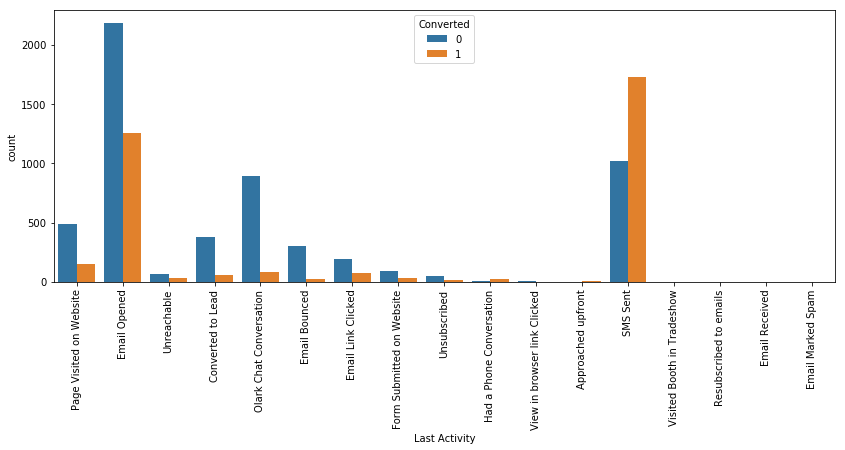

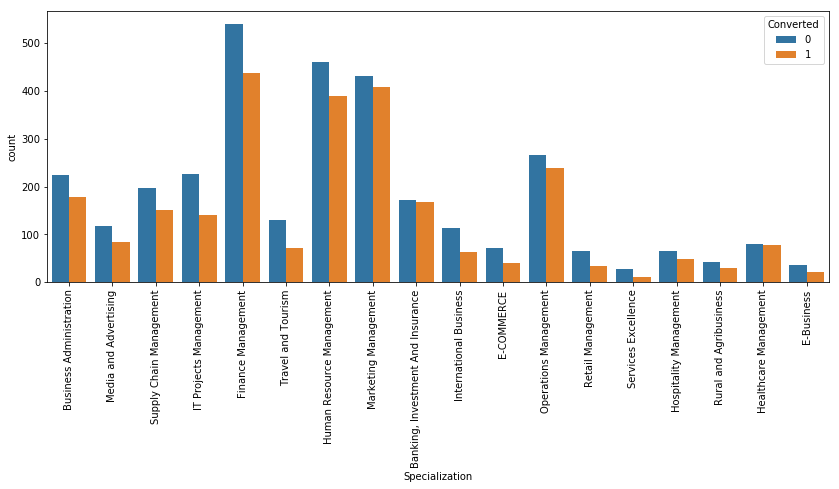

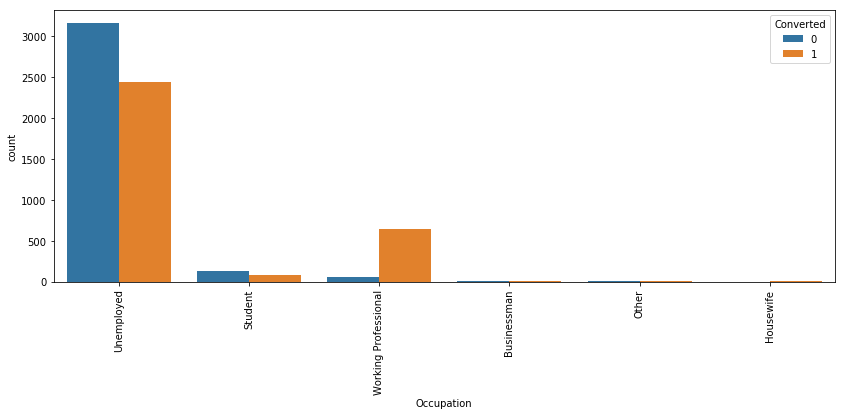

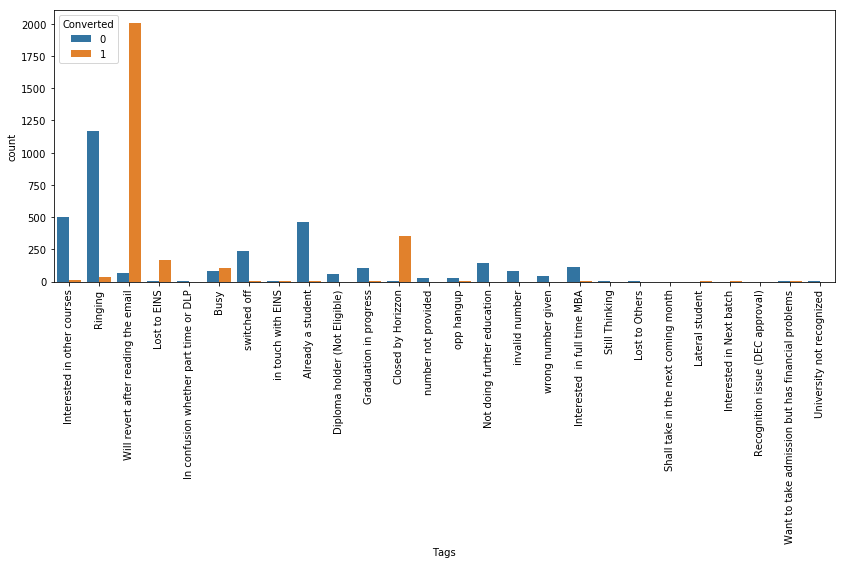

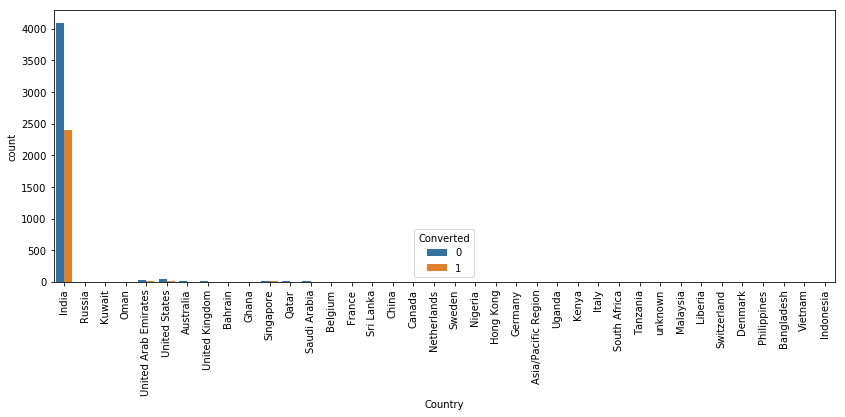

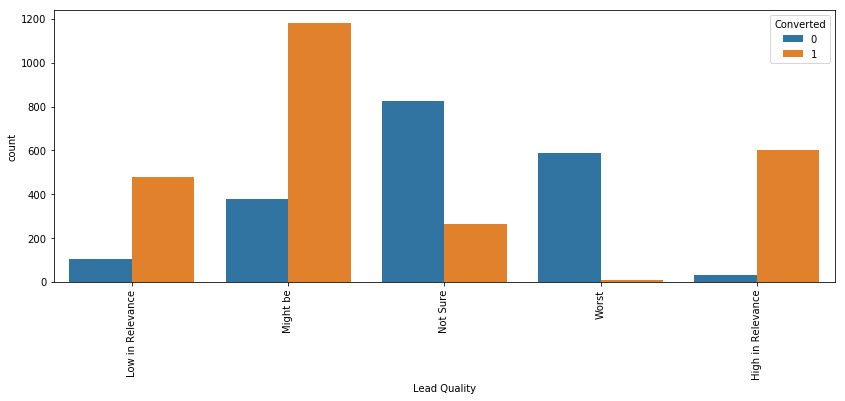

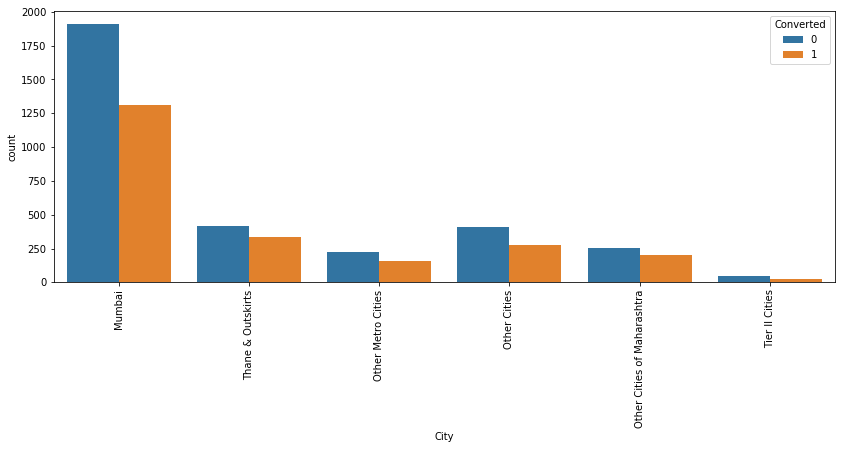

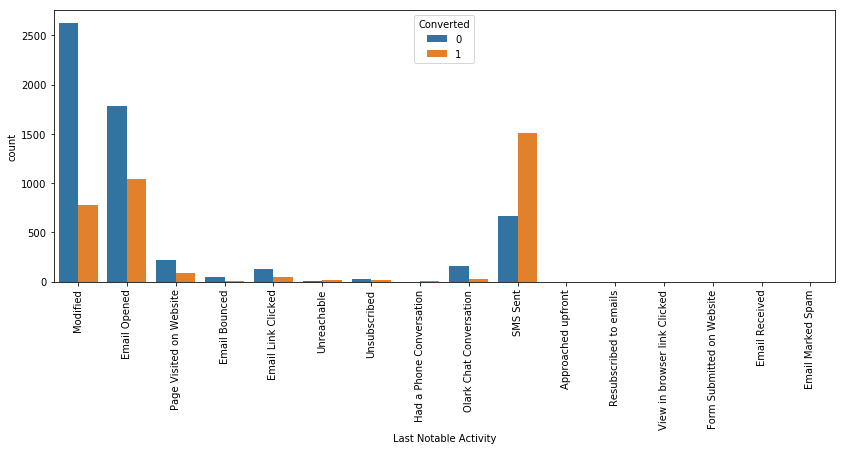

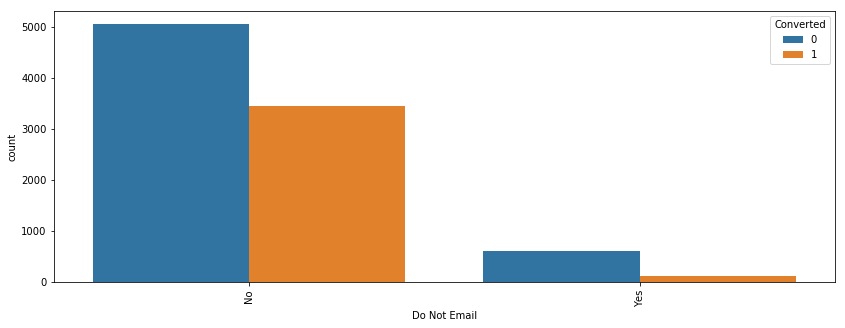

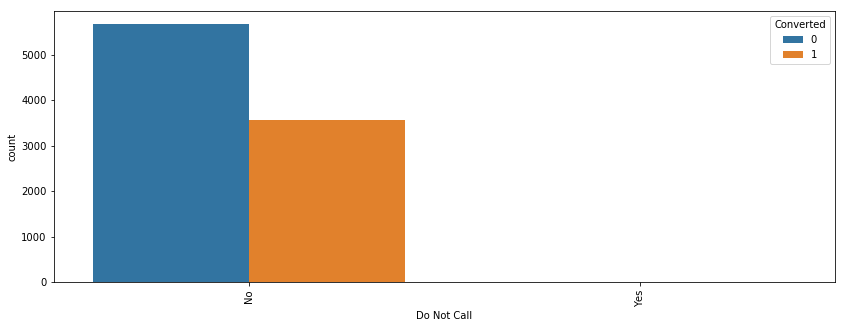

In [277]:
for feature in cat_vars:
    plt.figure(figsize=[14,5])
    sns.countplot(x=feature,hue='Converted', data=df)
    plt.xticks(rotation=90)
    plt.show()

Lead Origin:
From the chart it is observed Landing Page Submission has the highest conversion, followed by API. The conversion rate is highest for Lead Add Form.

Lead Source: 
From the chart it is observed that Olark chat , Organic Search , Direct Traffic, Google, Reference are contributing more on the Lead conversion as well are primary contributors of generating the leads as well. All the others where the contribution is less can be combined under "Other_LeadSource" Category so that the number of columns is not cluttered when we create dummy variables.

Last Activity: Last activity with SMS sent has the high lead conversion and most of the leads have the Email opened as the last activity. It could be possible that users are more comfortable with SMS service, having the details of the service , they have decided to join the course. Or possibly user has to send an confirmation SMS before the lead conversion as a process.

Specialization: Top three specializations having highest leads is from"Finance Management","Human Resource Management","Marketing Management", however the lead conversion is high on Marketing managemnet. 

Occupation: Working Professionals has the high lead conversion of joining the course compared to other categories. However,Unemployed leads are the highest in numbers with around 30-35% conversion rate.

Tags: Since the number of categories are so large it is better to consolidate the smaller ones into 'Other Tags'.

Country:
Since the number of countries are high we can divide them into Continents

Last Notable Activity: Same procedure needs to be performed as Tags

All the categorical columns need to handled for missing values as well which would be our next step

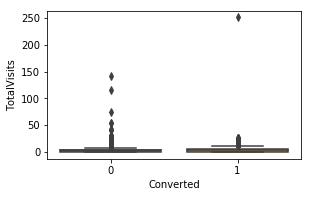

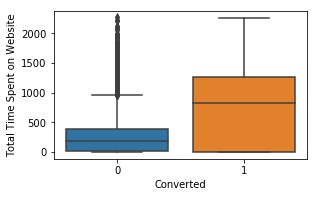

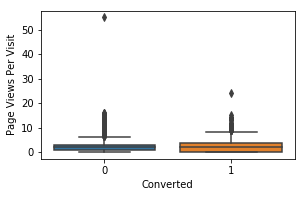

In [278]:
x=1
for features in cont_vars:
    plt.figure(figsize=[10,6])
    plt.subplot(2,2,x)
    sns.boxplot(y= features ,x='Converted',data=df)
    plt.show()
    x+=1

In [279]:
print(df['City'].value_counts())
#Replcing all the miissing values with 'Other Cities'
df['City']=df['City'].replace(np.nan,'Other Cities')
print('Null values:' , df['City'].isnull().sum())

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
Null values: 0


In [280]:
print(df['Occupation'].value_counts())
#Replacing the missing values with 'Other'
df['Occupation']=df['Occupation'].replace(np.nan,'Other')
print('Null values:' , df['Occupation'].isnull().sum())

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64
Null values: 0


In [281]:
#Replacing the missing values with unknown
df['Country']=df['Country'].replace(np.nan,'unknown')
#Since the number of counteries apart from India are relatively less we decided to group them Continent wise.
df['Country'] = df['Country'].replace(['Switzerland','Denmark','Netherlands','Italy','Germany','France','Belgium','Sweden'], 'Europe')
df['Country'] = df['Country'].replace(['United Arab Emirates','Saudi Arabia','Qatar','Bahrain','Oman','Kuwait'], 'UAE')
df['Country'] = df['Country'].replace(['Kenya','Tanzania','Liberia','Nigeria','South Africa','Uganda','Ghana'], 'SouthAfrica')
df['Country'] = df['Country'].replace(['Vietnam','Malaysia','Indonesia','Sri Lanka','China','Asia/Pacific Region','Singapore','Hong Kong','Philippines','Bangladesh'], 'Asia/Pacific Region')
df.Country.value_counts()

India                  6492
unknown                2466
UAE                     101
United States            69
Asia/Pacific Region      43
Europe                   21
United Kingdom           15
SouthAfrica              15
Australia                13
Canada                    4
Russia                    1
Name: Country, dtype: int64

In [282]:
df['Specialization']=df['Specialization'].replace(np.nan,'Other Specialization')
df['Specialization'].value_counts()

Other Specialization                 3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [283]:
df['Last Activity']=df['Last Activity'].replace(['Unsubscribed','Unreachable','Had a Phone Conversation','Approached upfront','View in browser link Clicked'
                                                 'Email Received','Email Marked Spam','Resubscribed to emails'
                                                ,'Visited Booth in Tradeshow'],'Other Activity')

In [284]:
#Taken the mean of all the 'value_counts()' using the .mean function 
#Came out to be 226 so will be summing the values into 'other tags' for the values which is less than 226.
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','invalid number','wrong number given','Interested  in full time MBA', 'Not doing further education',
                                    'Interested in other courses'], 'Other_Tags')
df['Tags'] = df['Tags'].replace(['Ringing','switched off'],'Busy')
#Since this column has high number of missing values which cannot be removed it is safe to put them into the 
#higghest category which is 'Will revert after reading the email'. 
df['Tags']=df['Tags'].replace(np.nan,'Will revert after reading the email')

In [285]:
#Based on intuition of the employee, if the value is missing we can impute it with 'Not Sure'
df['Lead Quality']=df['Lead Quality'].replace(np.nan,'Not Sure')

In [286]:
#Writting google properly
df['Lead Source']=df['Lead Source'].replace('google','Google')
#Placing the minor values into one consolidated entry
df['Lead Source']=df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')
#Renaming some enteries
df['Lead Source']=df['Lead Source'].replace('Facebook','Social Media')

### After handling the missing values and data manupulation we can re-plot all the graphs to view the differences

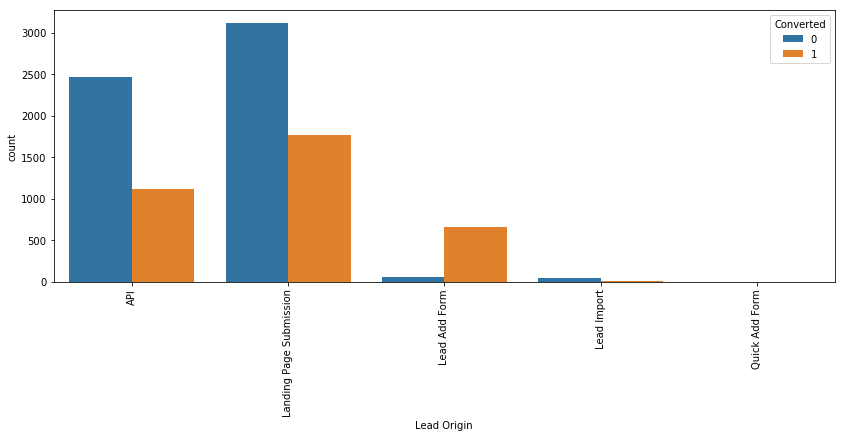

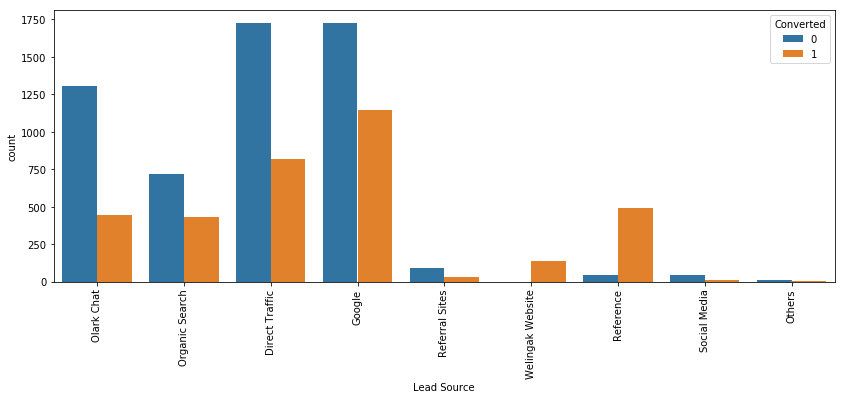

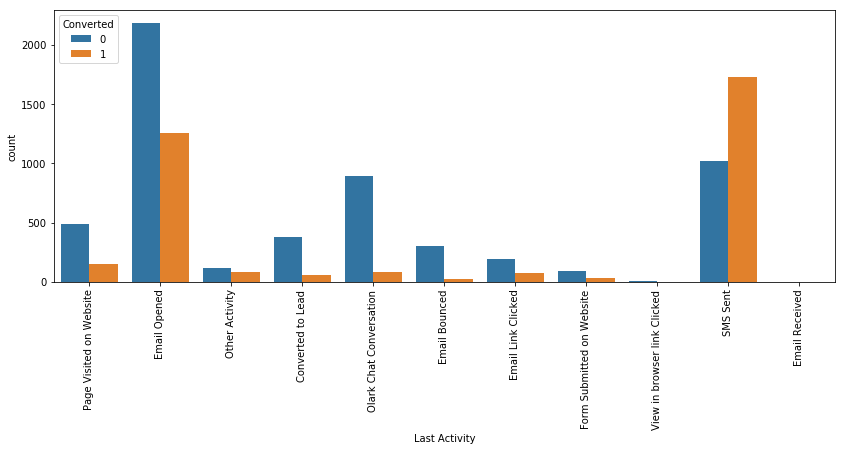

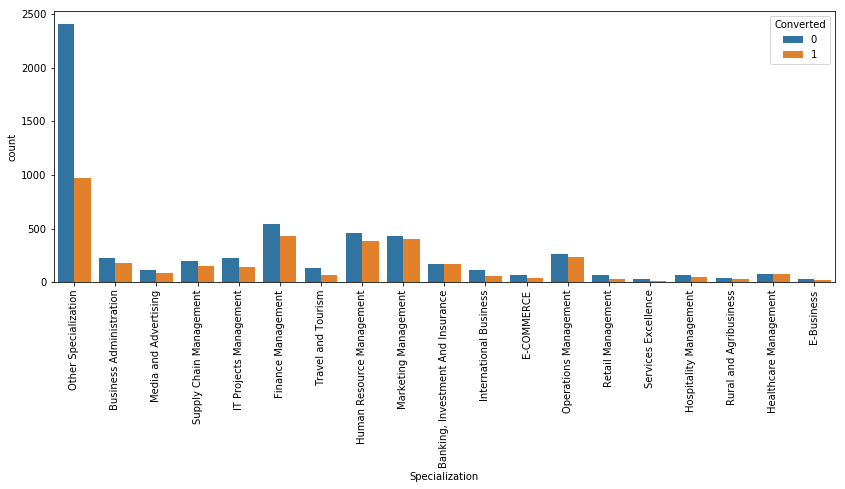

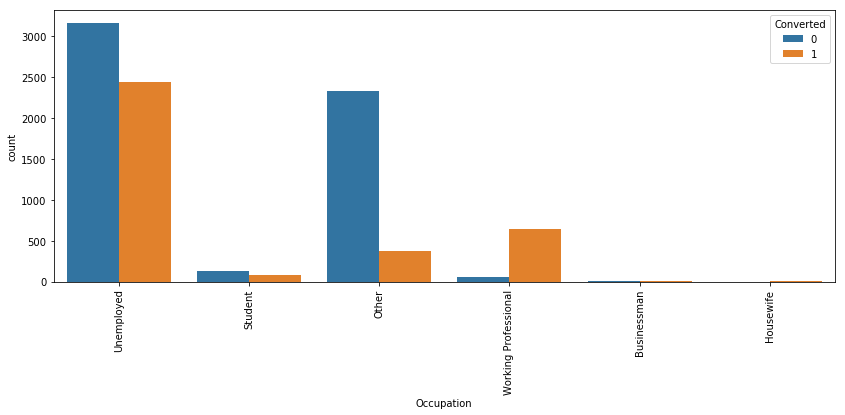

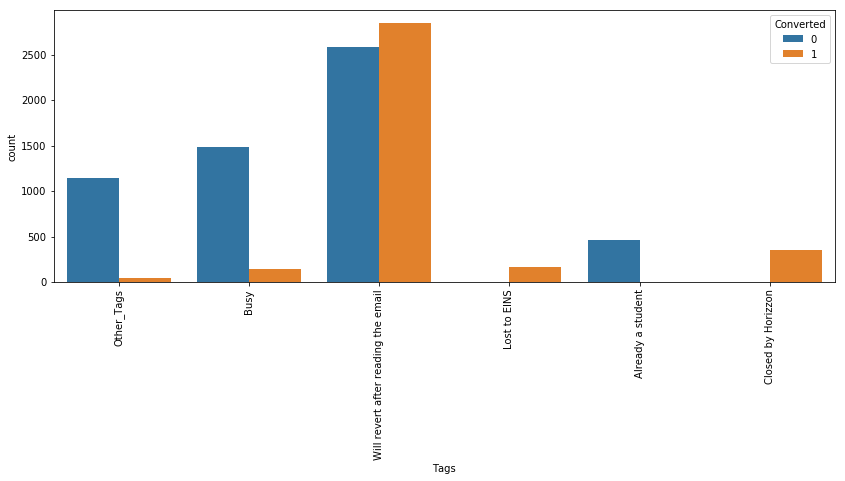

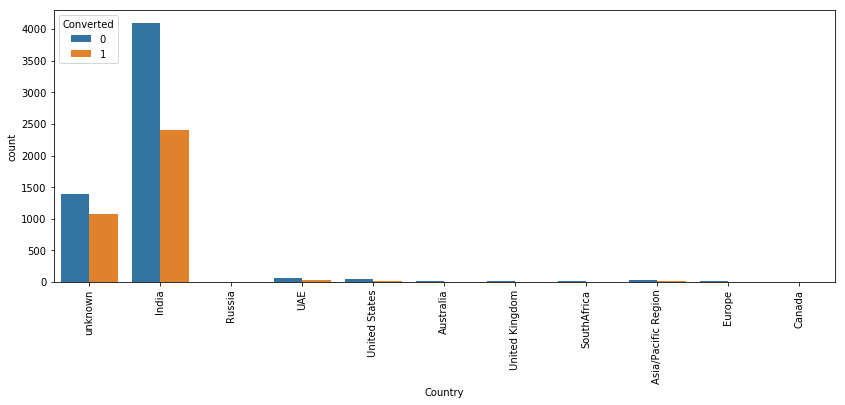

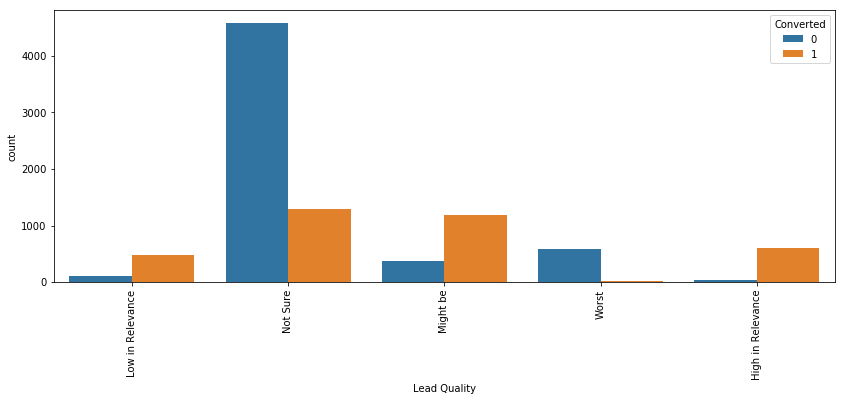

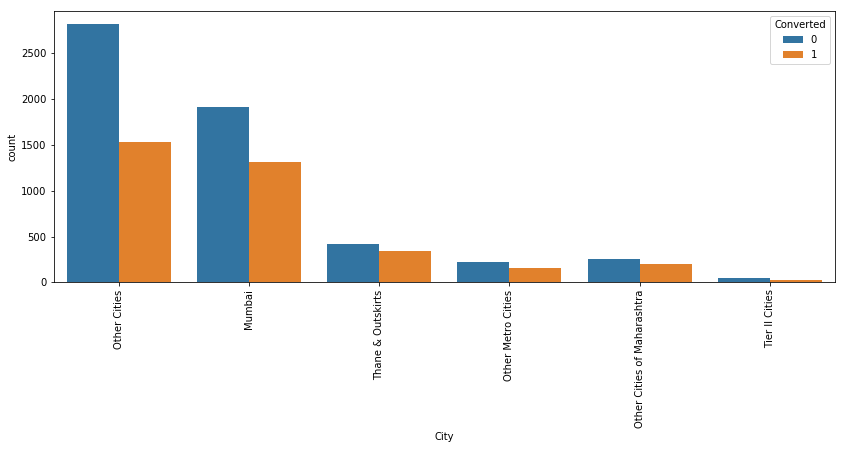

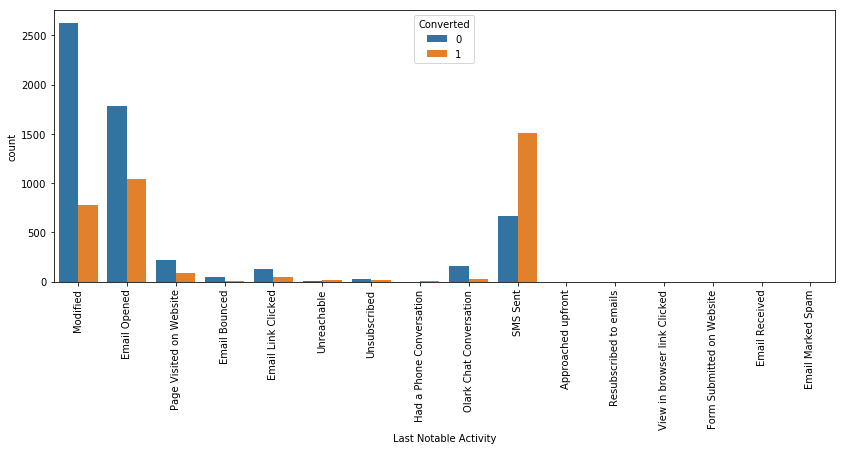

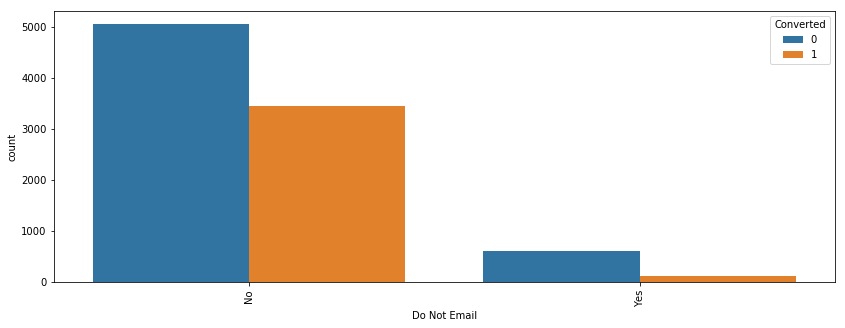

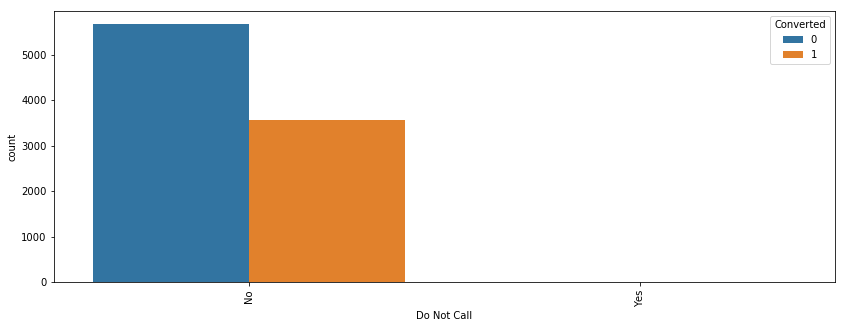

In [287]:
for feature in cat_vars:
    plt.figure(figsize=[14,5])
    sns.countplot(x=feature,hue='Converted', data=df)
    plt.xticks(rotation=90)
    plt.show()

### We can drop the rest of the values as they are very small in number we then check the status of the missing values.

In [288]:
df.dropna(inplace=True)
missing_value(df)

Total  Percentage
Last Notable Activity            0         0.0
City                             0         0.0
Lead Quality                     0         0.0
Tags                             0         0.0
Occupation                       0         0.0
Specialization                   0         0.0
Country                          0         0.0
Last Activity                    0         0.0
Page Views Per Visit             0         0.0
Total Time Spent on Website      0         0.0
TotalVisits                      0         0.0
Converted                        0         0.0
Do Not Call                      0         0.0
Do Not Email                     0         0.0
Lead Source                      0         0.0
Lead Origin                      0         0.0

### Data Imbalance checking for the number of people who convereted as a customer

In [289]:
converted=(sum(df['Converted'])/len(df['Converted'].index))*100
converted

37.85541106458012

# STEP 4: Data Preperation 

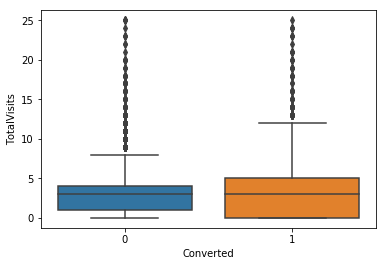

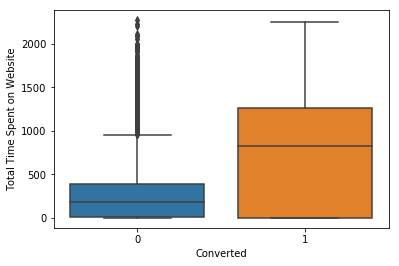

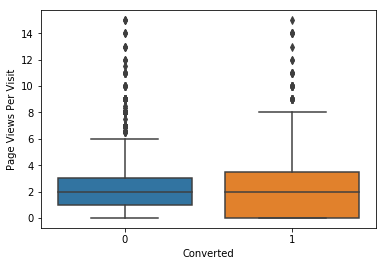

In [290]:
# removing (statistical) outliers
#Handling the outliers for 'TotalVisits'
Q1 = df.TotalVisits.quantile(0.05)
Q3 = df.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.TotalVisits >= Q1 - 1.5*IQR) & (df.TotalVisits <= Q3 + 1.5*IQR)]
sns.boxplot(y='TotalVisits', x='Converted', data=df)
plt.show()

#Handling the outliers for 'Total Time Spent on Website'
Q1 = df['Total Time Spent on Website'].quantile(0.05)
Q3 = df['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
df = df[(df['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (df['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=df)
plt.show()
#Handling the outliers for 'Page Views Per Visit'
Q1 = df['Page Views Per Visit'].quantile(0.05)
Q3 = df['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
df = df[(df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
sns.boxplot(y='Page Views Per Visit', x='Converted', data=df)
plt.show()

In [291]:
#This step is performed for categorical variables with just one level
varlist =  ['Do Not Email', 'Do Not Call']
#Dining the function
def binary_map(x):
    return x.map({'Yes':1,'No':0})

#Applying the function to the housing list
df[varlist]=df[varlist].apply(binary_map)

In [292]:
#For categorical variables with multiple levels 
cat_var=['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'Occupation','Tags',
           'Country','Lead Quality','City','Last Notable Activity']
dummy_vars=pd.get_dummies(df[cat_var],drop_first=True)
df=pd.concat([df,dummy_vars],axis=1)
df=df.drop(cat_var,axis=1)
dummy_vars.head()
df.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Email Received  Last Activity_Form Submitted on Website  \
0                             0                                        0   
1                             0                                        0   
2                             0                                        0   
3                             0                                        0   
4                             0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             1   
4                                      0  

# STEP 5: Train Test Split

In [293]:
#Train Test Split
#Making the X and y variables
X=df.drop(['Converted'],axis=1)
y=df['Converted']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [294]:
X_train.shape

(6333, 88)

In [295]:
X_test.shape

(2715, 88)

# STEP 6: Feature Scalling

In [296]:
#Standardizing only the continuous columns
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
8425             0            0    -1.015121                    -0.878510   
8341             0            0    -1.015121                    -0.878510   
7376             0            0    -0.402157                    -0.071940   
7414             0            0    -1.015121                    -0.878510   
3521             0            0     0.517288                     1.213416   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
8425             -1.145788                                    0   
8341             -1.145788                                    0   
7376             -0.165214                                    1   
7414             -1.145788                                    0   
3521              1.305648                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
8425                          0                        0                   0   
8341                          0                        0                   0   
7376                          0                        0                   0   
7414                          0                        0                   0   
3521                          0                        0                   1   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
8425                       1                           0                   0   
8341                       1                           0                   0   
7376                       0                           0                   0   
7414                       1                           0                   0   
3521                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
8425                      0                           0   
8341                      0                           0   
7376                      0                           0   
7414                      0                           0   
3521                      0                           0   

      Lead Source_Social Media  Lead Source_Welingak Website  \
8425                         0                             0   
8341                         0                             0   
7376                         0                             0   
7414                         0                             0   
3521                         0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
8425                            0                                 0   
8341                            0                                 0   
7376                            0                                 0   
7414                            0                                 0   
3521                            0                                 0   

      Last Activity_Email Opened  Last Activity_Email Received  \
8425                           1                             0   
8341                           1                             0   
7376                           1                             0   
7414                           1                             0   
3521                           0                             0   

      Last Activity_Form Submitted on Website  \
8425                                        0   
8341                                        0   
7376                                        0   
7414                                        0   
3521                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
8425                                      0                             0   
8341                                      0                             0   
7376                                      0                             0   
7414       

In [297]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
4462             0            0    -1.015121                    -0.878510   
5243             0            0    -0.402157                    -0.582031   
4597             0            0    -0.402157                    -0.086672   
4680             0            0    -1.015121                    -0.878510   
5355             0            0    -1.015121                    -0.878510   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
4462             -1.145788                                    0   
5243             -0.165214                                    0   
4597             -0.165214                                    1   
4680             -1.145788                                    0   
5355             -1.145788                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
4462                          0                        0                   0   
5243                          0                        0                   1   
4597                          0                        0                   0   
4680                          1                        0                   0   
5355                          0                        0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4462                       1                           0                   0   
5243                       0                           0                   0   
4597                       0                           0                   0   
4680                       0                           0                   0   
5355                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4462                      0                           0   
5243                      0                           0   
4597                      0                           0   
4680                      0                           0   
5355                      0                           0   

      Lead Source_Social Media  Lead Source_Welingak Website  \
4462                         0                             0   
5243                         0                             0   
4597                         0                             0   
4680                         0                             1   
5355                         0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
4462                            0                                 0   
5243                            0                                 0   
4597                            0                                 0   
4680                            0                                 0   
5355                            0                                 0   

      Last Activity_Email Opened  Last Activity_Email Received  \
4462                           0                             0   
5243                           0                             0   
4597                           1                             0   
4680                           0                             0   
5355                           1                             0   

      Last Activity_Form Submitted on Website  \
4462                                        0   
5243                                        0   
4597                                        0   
4680                                        0   
5355                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
4462                                      0                             0   
5243                                      0                             1   
4597                                      0                             0   
4680       

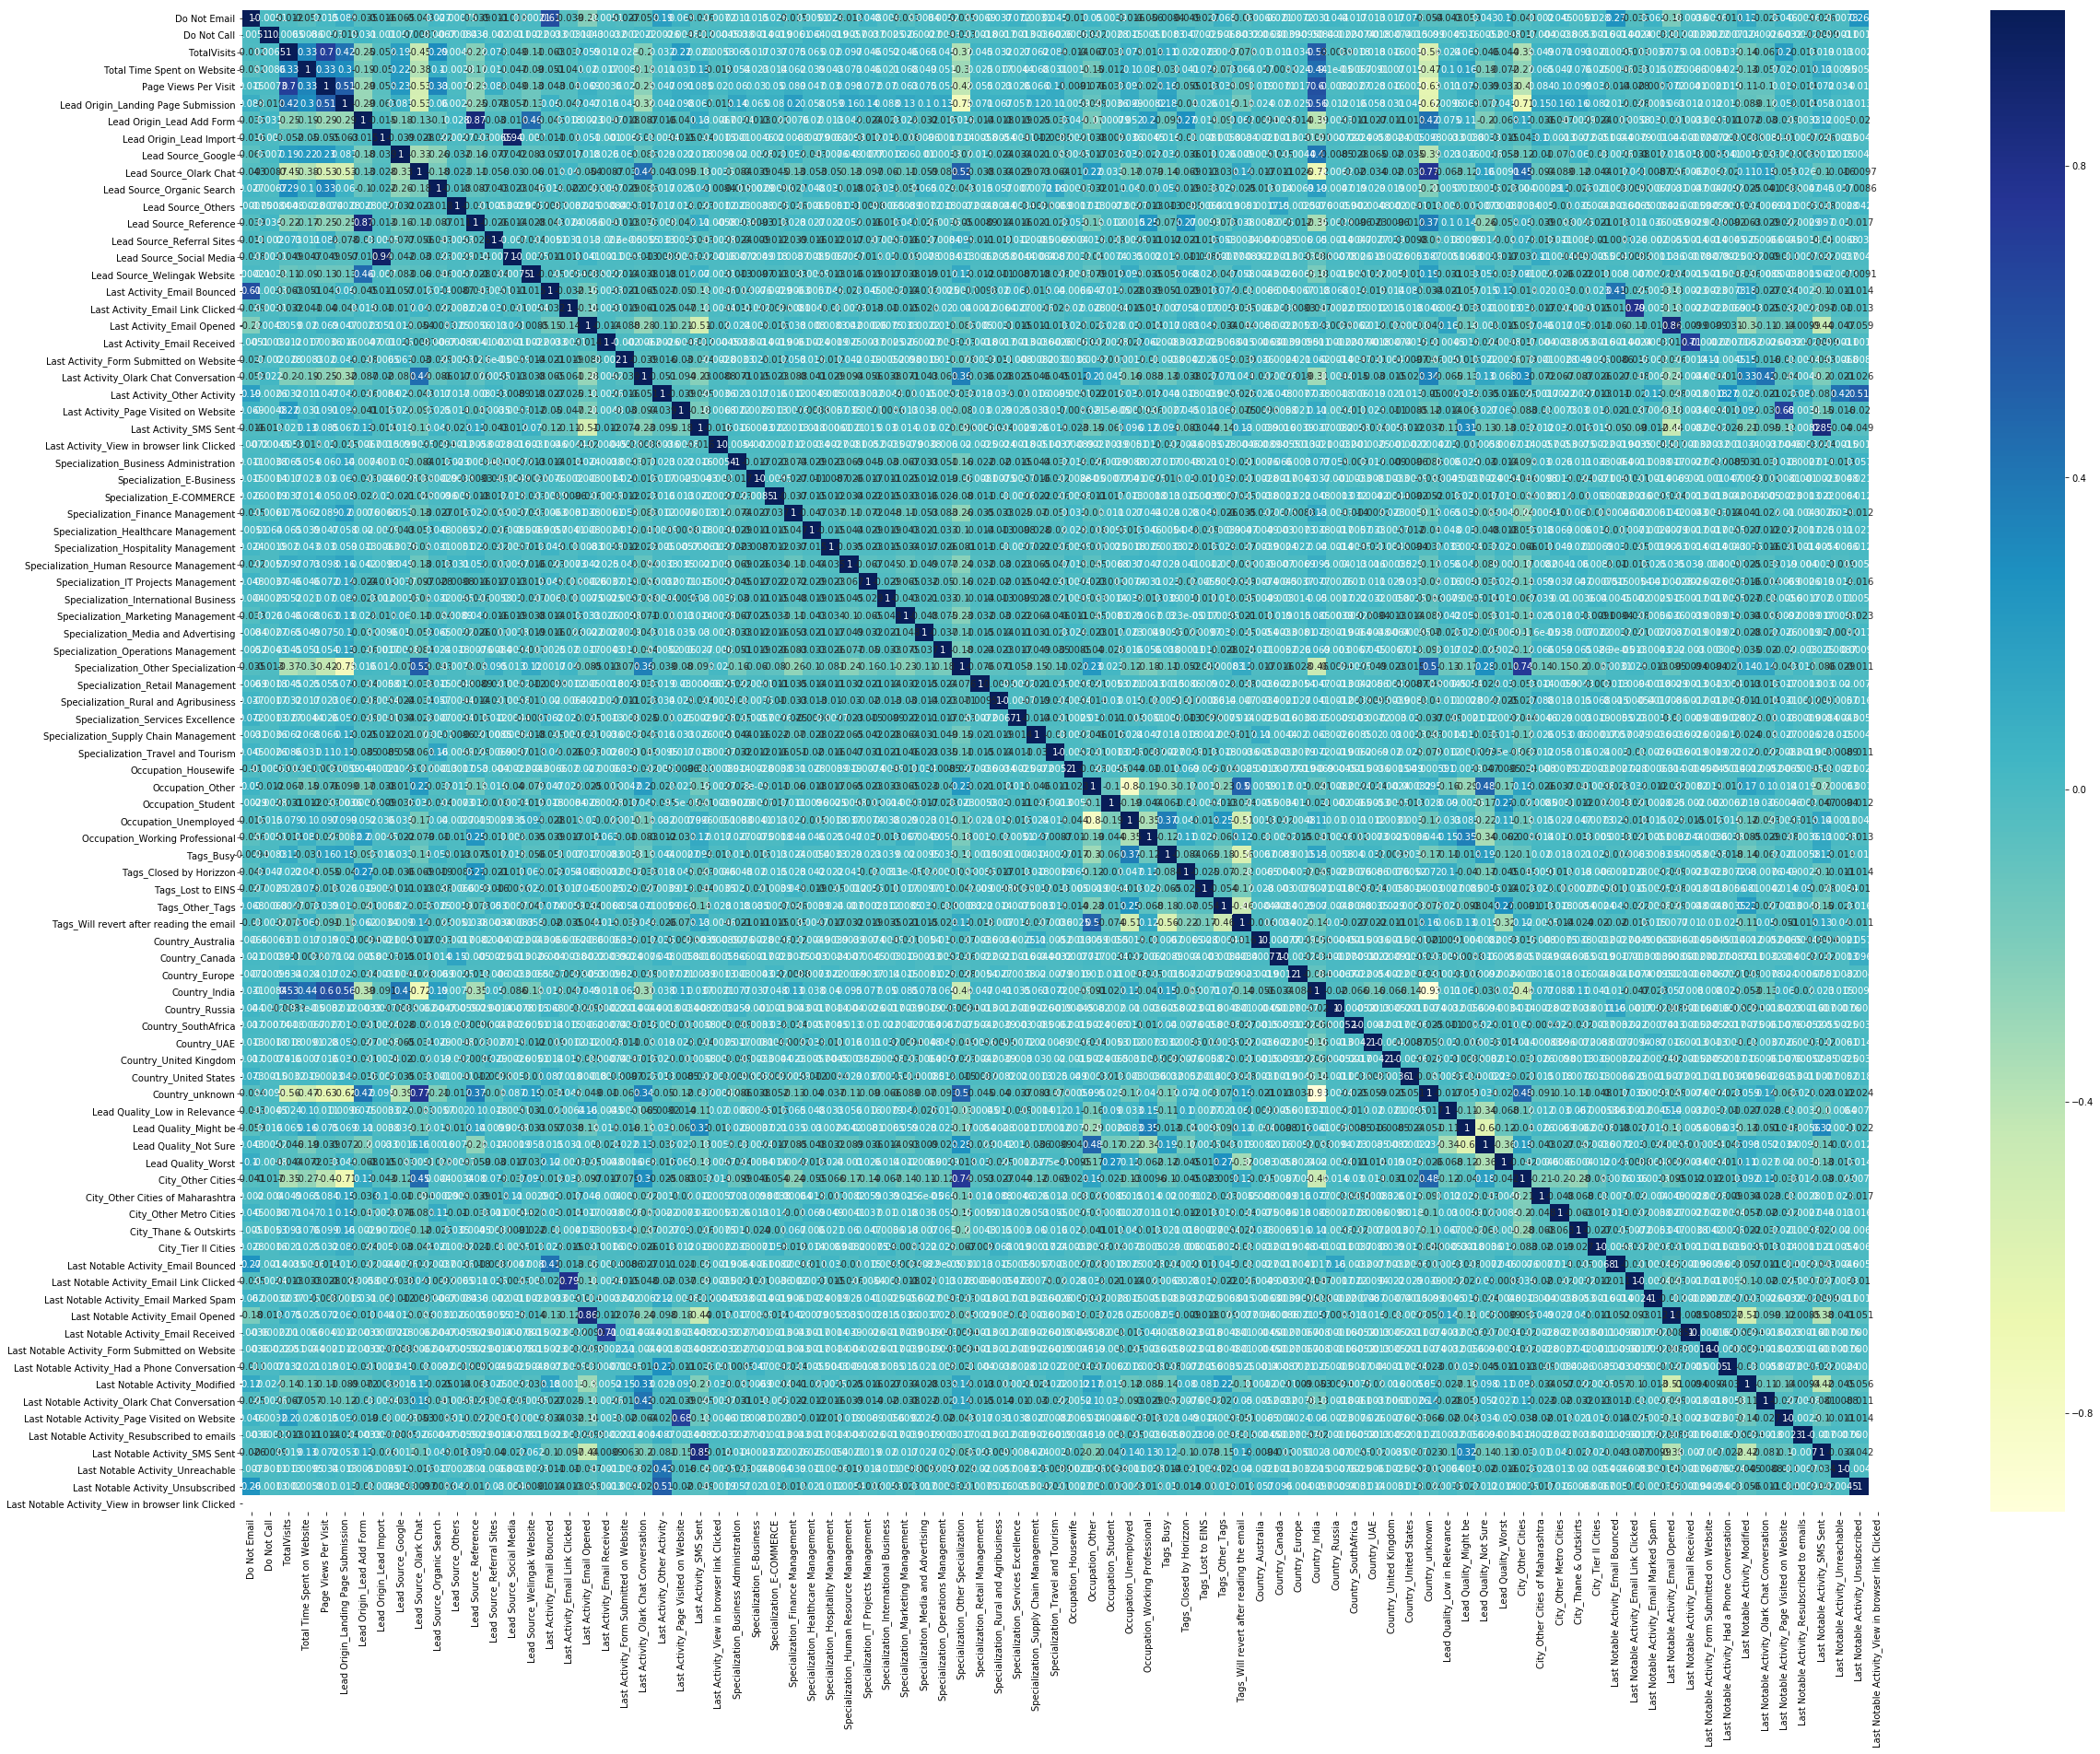

In [299]:
#Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (40, 30))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# STEP 7: Building the model

In [300]:
#Using RFE to filter out the unneccessary columns
#Running RFE for 30 variables
logreg=LogisticRegression()
rfe=RFE(logreg,30)
rfe=rfe.fit(X_train,y_train)

In [301]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 45),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', False, 5),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Olark Chat', False, 20),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 43),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 55),
 ('Lead Source_Social Media', False, 11),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 47),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Email Received', False, 48),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', False, 2),
 ('Last Activity_Page Visited on Website'

In [302]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_Other Specialization',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Occupation_Other',
       'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other_Tags',
       'Tags_Will revert after reading the email', 'Country_United Kingdom',
       'Country_unknown', 'Lead Quality_Might be', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'City_Tier II Cities',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Se

In [303]:
col=X_train.columns[rfe.support_]

### First Iteration

In [304]:
X_train_sm=sm.add_constant(X_train[col])
lm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()                        

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1191.6
Date:                Sun, 22 Nov 2020   Deviance:                       2383.2
Time:                        23:40:44   Pearson chi2:                 1.44e+04
No. Iterations:                    24   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.0193      0.813     -2.485      0.013      -3.612      -0.427
Do Not Email                                      -0.9911      0.285     -3.481      0.000      -1.549      -0.433
Total Time Spent on Website                        1.0305      0.062     16.591      0.000       0.909       1.152
Lead Origin_Landing Page Submission               -0.8133      0.208     -3.918      0.000      -1.220      -0.406
Lead Origin_Lead Import                           -1.3561      0.695     -1.950      0.051      -2.719       0.007
Lead Source_Welingak Website                       2.8922      1.038      2.787      0.005       0.858       4.926
Last Activity_Email Bounced                       -1.0224      0.549     -1.863      0.062      -2.098       0.053
Last Activity_Olark Chat Conversation             -0.6809      0.298     -2.282      0.022      -1.266      -0.096
Last Activity_SMS Sent                             1.4342      0.248      5.783      0.000       0.948       1.920
Specialization_Hospitality Management             -0.7102      0.487     -1.459      0.145      -1.664       0.244
Specialization_Other Specialization               -0.7115      0.205     -3.469      0.001      -1.113      -0.310
Specialization_Retail Management                  -1.0088      0.540     -1.868      0.062      -2.067       0.050
Specialization_Rural and Agribusiness              0.8226      0.584      1.408      0.159      -0.322       1.968
Occupation_Other                                  -3.0927      0.151    -20.484      0.000      -3.389      -2.797
Occupation_Working Professional                    0.7502      0.312      2.402      0.016       0.138       1.362
Tags_Busy                                          0.9575      0.786      1.219      0.223      -0.582       2.497
Tags_Closed by Horizzon                           29.2536   1.32e+04      0.002      0.998   -2.58e+04    2.58e+04
Tags_Lost to EINS                                 10.6376      1.025     10.382      0.000       8.629      12.646
Tags_Other_Tags                                    0.7109      0.791      0.899      0.369      -0.839       2.261
Tags_Will revert after reading the email           5.6286      0.779      7.221      0.000       4.101       7.156
Country_United Kingdom                             1.6188      1.107      1.462      0.144      -0.552       3.789
Country_unknown                                    0.8650      0.180      4.797      0.000       0.512       1.218
Lead Quality_Might be                             -1.3122      0.265     -4.960      0.000      -1.831      -0.794
Lead Quality_Not Sure                             -2.1523      0.248     -8.672      0.000      -2.639      -1.666
Lead Quality_Worst                                -3.0276

In [305]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
22                           Lead Quality_Not Sure  8.61
18        Tags_Will revert after reading the email  7.99
28                  Last Notable Activity_SMS Sent  6.85
7                           Last Activity_SMS Sent  6.59
2              Lead Origin_Landing Page Submission  5.72
9              Specialization_Other Specialization  4.31
12                                Occupation_Other  3.40
14                                       Tags_Busy  3.36
26                  Last Notable Activity_Modified  2.99
20                                 Country_unknown  2.81
21                           Lead Quality_Might be  2.58
17                                 Tags_Other_Tags  2.22
6            Last Activity_Olark Chat Conversation  2.14
5                      Last Activity_Email Bounced  1.77
0                                     Do Not Email  1.77
23                              Lead Quality_Worst  1.63
1                      Total Time Spent on Website  1.48
27   Last Notable Activity_Olark Chat Conversation  1.41
13                 Occupation_Working Professional  1.38
15                         Tags_Closed by Horizzon  1.30
16                               Tags_Lost to EINS  1.24
4                     Lead Source_Welingak Website  1.13
3                          Lead Origin_Lead Import  1.03
11           Specialization_Rural and Agribusiness  1.02
10                Specialization_Retail Management  1.02
24                             City_Tier II Cities  1.02
8            Specialization_Hospitality Management  1.02
19                          Country_United Kingdom  1.01
25  Last Notable Activity_Had a Phone Conversation  1.01
29               Last Notable Activity_Unreachable  1.01

### Second Iteration

In [306]:
#Based on the highest P-value we will be eliminating the columns
col=col.drop(['Tags_Closed by Horizzon'])
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1303.3
Date:                Sun, 22 Nov 2020   Deviance:                       2606.5
Time:                        23:40:46   Pearson chi2:                 2.05e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              2.7887      0.291      9.571      0.000       2.218       3.360
Do Not Email                                      -1.0214      0.285     -3.583      0.000      -1.580      -0.463
Total Time Spent on Website                        1.0073      0.059     17.073      0.000       0.892       1.123
Lead Origin_Landing Page Submission               -0.9004      0.198     -4.549      0.000      -1.288      -0.512
Lead Origin_Lead Import                           -1.4235      0.713     -1.997      0.046      -2.821      -0.026
Lead Source_Welingak Website                       3.6929      1.050      3.517      0.000       1.635       5.751
Last Activity_Email Bounced                       -1.0329      0.540     -1.913      0.056      -2.091       0.025
Last Activity_Olark Chat Conversation             -0.9227      0.269     -3.431      0.001      -1.450      -0.396
Last Activity_SMS Sent                             1.2137      0.229      5.299      0.000       0.765       1.663
Specialization_Hospitality Management             -0.5666      0.454     -1.249      0.212      -1.455       0.322
Specialization_Other Specialization               -0.7432      0.195     -3.802      0.000      -1.126      -0.360
Specialization_Retail Management                  -0.7909      0.498     -1.587      0.113      -1.768       0.186
Specialization_Rural and Agribusiness              0.8227      0.575      1.431      0.152      -0.304       1.950
Occupation_Other                                  -2.9812      0.146    -20.375      0.000      -3.268      -2.694
Occupation_Working Professional                    0.8292      0.285      2.909      0.004       0.271       1.388
Tags_Busy                                         -3.3288      0.235    -14.173      0.000      -3.789      -2.868
Tags_Lost to EINS                                  6.3789      0.677      9.416      0.000       5.051       7.707
Tags_Other_Tags                                   -3.8173      0.286    -13.338      0.000      -4.378      -3.256
Tags_Will revert after reading the email           1.2276      0.200      6.134      0.000       0.835       1.620
Country_United Kingdom                             1.5089      1.069      1.411      0.158      -0.586       3.604
Country_unknown                                    0.9647      0.171      5.642      0.000       0.630       1.300
Lead Quality_Might be                             -1.8669      0.245     -7.632      0.000      -2.346      -1.387
Lead Quality_Not Sure                             -2.7412      0.225    -12.204      0.000      -3.181      -2.301
Lead Quality_Worst                                -6.1505      0.571    -10.772      0.000      -7.270      -5.031
City_Tier II Cities                                0.6000

In [307]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
21                           Lead Quality_Not Sure  8.60
17        Tags_Will revert after reading the email  7.12
27                  Last Notable Activity_SMS Sent  6.83
7                           Last Activity_SMS Sent  6.58
2              Lead Origin_Landing Page Submission  5.18
9              Specialization_Other Specialization  4.15
12                                Occupation_Other  3.40
14                                       Tags_Busy  3.18
25                  Last Notable Activity_Modified  2.88
19                                 Country_unknown  2.61
20                           Lead Quality_Might be  2.58
6            Last Activity_Olark Chat Conversation  2.11
16                                 Tags_Other_Tags  2.10
0                                     Do Not Email  1.77
5                      Last Activity_Email Bounced  1.77
22                              Lead Quality_Worst  1.60
1                      Total Time Spent on Website  1.45
26   Last Notable Activity_Olark Chat Conversation  1.40
13                 Occupation_Working Professional  1.34
15                               Tags_Lost to EINS  1.20
4                     Lead Source_Welingak Website  1.13
3                          Lead Origin_Lead Import  1.03
11           Specialization_Rural and Agribusiness  1.02
10                Specialization_Retail Management  1.02
8            Specialization_Hospitality Management  1.02
23                             City_Tier II Cities  1.02
18                          Country_United Kingdom  1.01
24  Last Notable Activity_Had a Phone Conversation  1.01
28               Last Notable Activity_Unreachable  1.01

### Third Iteration

In [308]:
col=col.drop(['City_Tier II Cities'])
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1303.9
Date:                Sun, 22 Nov 2020   Deviance:                       2607.9
Time:                        23:40:48   Pearson chi2:                 2.05e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              2.7846      0.291      9.564      0.000       2.214       3.355
Do Not Email                                      -1.0271      0.286     -3.591      0.000      -1.588      -0.467
Total Time Spent on Website                        1.0068      0.059     17.072      0.000       0.891       1.122
Lead Origin_Landing Page Submission               -0.8927      0.198     -4.516      0.000      -1.280      -0.505
Lead Origin_Lead Import                           -1.4211      0.713     -1.992      0.046      -2.819      -0.023
Lead Source_Welingak Website                       3.6948      1.050      3.519      0.000       1.637       5.753
Last Activity_Email Bounced                       -0.9983      0.538     -1.855      0.064      -2.053       0.057
Last Activity_Olark Chat Conversation             -0.9233      0.269     -3.434      0.001      -1.450      -0.396
Last Activity_SMS Sent                             1.2101      0.229      5.289      0.000       0.762       1.659
Specialization_Hospitality Management             -0.5742      0.453     -1.268      0.205      -1.462       0.314
Specialization_Other Specialization               -0.7455      0.195     -3.817      0.000      -1.128      -0.363
Specialization_Retail Management                  -0.8003      0.498     -1.607      0.108      -1.776       0.176
Specialization_Rural and Agribusiness              0.8472      0.576      1.470      0.141      -0.282       1.976
Occupation_Other                                  -2.9782      0.146    -20.366      0.000      -3.265      -2.692
Occupation_Working Professional                    0.8353      0.285      2.928      0.003       0.276       1.394
Tags_Busy                                         -3.3207      0.235    -14.151      0.000      -3.781      -2.861
Tags_Lost to EINS                                  6.3943      0.676      9.457      0.000       5.069       7.720
Tags_Other_Tags                                   -3.8084      0.285    -13.340      0.000      -4.368      -3.249
Tags_Will revert after reading the email           1.2297      0.200      6.146      0.000       0.838       1.622
Country_United Kingdom                             1.6285      1.066      1.528      0.126      -0.460       3.717
Country_unknown                                    0.9648      0.171      5.644      0.000       0.630       1.300
Lead Quality_Might be                             -1.8666      0.245     -7.633      0.000      -2.346      -1.387
Lead Quality_Not Sure                             -2.7419      0.224    -12.214      0.000      -3.182      -2.302
Lead Quality_Worst                                -6.1267      0.571    -10.730      0.000      -7.246      -5.008
Last Notable Activity_Had a Phone Conversation     2.7571

In [309]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
21                           Lead Quality_Not Sure  8.60
17        Tags_Will revert after reading the email  7.12
26                  Last Notable Activity_SMS Sent  6.83
7                           Last Activity_SMS Sent  6.58
2              Lead Origin_Landing Page Submission  5.18
9              Specialization_Other Specialization  4.15
12                                Occupation_Other  3.40
14                                       Tags_Busy  3.18
24                  Last Notable Activity_Modified  2.88
19                                 Country_unknown  2.61
20                           Lead Quality_Might be  2.58
6            Last Activity_Olark Chat Conversation  2.11
16                                 Tags_Other_Tags  2.10
0                                     Do Not Email  1.77
5                      Last Activity_Email Bounced  1.77
22                              Lead Quality_Worst  1.60
1                      Total Time Spent on Website  1.45
25   Last Notable Activity_Olark Chat Conversation  1.40
13                 Occupation_Working Professional  1.34
15                               Tags_Lost to EINS  1.20
4                     Lead Source_Welingak Website  1.13
3                          Lead Origin_Lead Import  1.03
11           Specialization_Rural and Agribusiness  1.02
10                Specialization_Retail Management  1.02
8            Specialization_Hospitality Management  1.02
23  Last Notable Activity_Had a Phone Conversation  1.01
27               Last Notable Activity_Unreachable  1.01
18                          Country_United Kingdom  1.00

### Fourth Iteration

In [310]:
col=col.drop(['Specialization_Hospitality Management'])
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1304.7
Date:                Sun, 22 Nov 2020   Deviance:                       2609.5
Time:                        23:40:51   Pearson chi2:                 2.05e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              2.7690      0.291      9.508      0.000       2.198       3.340
Do Not Email                                      -1.0365      0.287     -3.617      0.000      -1.598      -0.475
Total Time Spent on Website                        1.0029      0.059     17.052      0.000       0.888       1.118
Lead Origin_Landing Page Submission               -0.8866      0.197     -4.490      0.000      -1.274      -0.500
Lead Origin_Lead Import                           -1.4091      0.712     -1.979      0.048      -2.804      -0.014
Lead Source_Welingak Website                       3.6946      1.050      3.520      0.000       1.637       5.752
Last Activity_Email Bounced                       -0.9934      0.540     -1.838      0.066      -2.053       0.066
Last Activity_Olark Chat Conversation             -0.9207      0.269     -3.423      0.001      -1.448      -0.394
Last Activity_SMS Sent                             1.2084      0.229      5.284      0.000       0.760       1.657
Specialization_Other Specialization               -0.7269      0.195     -3.734      0.000      -1.108      -0.345
Specialization_Retail Management                  -0.7858      0.498     -1.579      0.114      -1.761       0.190
Specialization_Rural and Agribusiness              0.8593      0.576      1.492      0.136      -0.270       1.988
Occupation_Other                                  -2.9799      0.146    -20.379      0.000      -3.266      -2.693
Occupation_Working Professional                    0.8260      0.284      2.906      0.004       0.269       1.383
Tags_Busy                                         -3.3258      0.235    -14.170      0.000      -3.786      -2.866
Tags_Lost to EINS                                  6.4014      0.676      9.467      0.000       5.076       7.727
Tags_Other_Tags                                   -3.8109      0.285    -13.357      0.000      -4.370      -3.252
Tags_Will revert after reading the email           1.2266      0.200      6.132      0.000       0.835       1.619
Country_United Kingdom                             1.6379      1.065      1.538      0.124      -0.449       3.725
Country_unknown                                    0.9557      0.171      5.598      0.000       0.621       1.290
Lead Quality_Might be                             -1.8624      0.244     -7.626      0.000      -2.341      -1.384
Lead Quality_Not Sure                             -2.7343      0.224    -12.191      0.000      -3.174      -2.295
Lead Quality_Worst                                -6.1182      0.571    -10.715      0.000      -7.237      -4.999
Last Notable Activity_Had a Phone Conversation     2.7651      1.385      1.996      0.046       0.050       5.480
Last Notable Activity_Modified                    -0.5568

In [311]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
20                           Lead Quality_Not Sure  8.60
16        Tags_Will revert after reading the email  7.11
25                  Last Notable Activity_SMS Sent  6.83
7                           Last Activity_SMS Sent  6.58
2              Lead Origin_Landing Page Submission  5.18
8              Specialization_Other Specialization  4.14
11                                Occupation_Other  3.40
13                                       Tags_Busy  3.18
23                  Last Notable Activity_Modified  2.88
18                                 Country_unknown  2.61
19                           Lead Quality_Might be  2.58
6            Last Activity_Olark Chat Conversation  2.11
15                                 Tags_Other_Tags  2.09
0                                     Do Not Email  1.77
5                      Last Activity_Email Bounced  1.77
21                              Lead Quality_Worst  1.60
1                      Total Time Spent on Website  1.45
24   Last Notable Activity_Olark Chat Conversation  1.40
12                 Occupation_Working Professional  1.34
14                               Tags_Lost to EINS  1.20
4                     Lead Source_Welingak Website  1.13
3                          Lead Origin_Lead Import  1.03
10           Specialization_Rural and Agribusiness  1.02
9                 Specialization_Retail Management  1.02
22  Last Notable Activity_Had a Phone Conversation  1.01
26               Last Notable Activity_Unreachable  1.01
17                          Country_United Kingdom  1.00

### Fifth Iteration

In [312]:
col=col.drop(['Lead Quality_Not Sure'])
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1401.2
Date:                Sun, 22 Nov 2020   Deviance:                       2802.4
Time:                        23:40:53   Pearson chi2:                 1.16e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.4084      0.226      6.221      0.000       0.965       1.852
Do Not Email                                      -1.0987      0.282     -3.891      0.000      -1.652      -0.545
Total Time Spent on Website                        1.0255      0.057     18.057      0.000       0.914       1.137
Lead Origin_Landing Page Submission               -1.2717      0.182     -6.971      0.000      -1.629      -0.914
Lead Origin_Lead Import                           -1.6772      0.658     -2.549      0.011      -2.967      -0.387
Lead Source_Welingak Website                       3.1001      1.045      2.966      0.003       1.051       5.149
Last Activity_Email Bounced                       -1.0614      0.514     -2.065      0.039      -2.069      -0.054
Last Activity_Olark Chat Conversation             -1.1606      0.261     -4.449      0.000      -1.672      -0.649
Last Activity_SMS Sent                             1.1123      0.220      5.061      0.000       0.682       1.543
Specialization_Other Specialization               -1.3786      0.177     -7.773      0.000      -1.726      -1.031
Specialization_Retail Management                  -0.5380      0.465     -1.156      0.248      -1.450       0.374
Specialization_Rural and Agribusiness              0.7148      0.523      1.366      0.172      -0.311       1.740
Occupation_Other                                  -3.5835      0.139    -25.825      0.000      -3.855      -3.312
Occupation_Working Professional                    1.3387      0.277      4.840      0.000       0.797       1.881
Tags_Busy                                         -4.0634      0.212    -19.128      0.000      -4.480      -3.647
Tags_Lost to EINS                                  6.1181      0.681      8.985      0.000       4.783       7.453
Tags_Other_Tags                                   -3.9069      0.262    -14.935      0.000      -4.420      -3.394
Tags_Will revert after reading the email           0.9583      0.173      5.540      0.000       0.619       1.297
Country_United Kingdom                             1.7037      1.101      1.548      0.122      -0.454       3.861
Country_unknown                                    1.0997      0.167      6.582      0.000       0.772       1.427
Lead Quality_Might be                              0.2681      0.156      1.716      0.086      -0.038       0.574
Lead Quality_Worst                                -4.3327      0.531     -8.155      0.000      -5.374      -3.291
Last Notable Activity_Had a Phone Conversation     3.6201      1.440      2.514      0.012       0.798       6.443
Last Notable Activity_Modified                    -0.5093      0.145     -3.504      0.000      -0.794      -0.224
Last Notable Activity_Olark Chat Conversation     -0.7972

In [313]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
24                  Last Notable Activity_SMS Sent  6.80
16        Tags_Will revert after reading the email  6.58
7                           Last Activity_SMS Sent  6.57
2              Lead Origin_Landing Page Submission  4.54
8              Specialization_Other Specialization  3.50
11                                Occupation_Other  2.90
22                  Last Notable Activity_Modified  2.86
18                                 Country_unknown  2.61
13                                       Tags_Busy  2.37
6            Last Activity_Olark Chat Conversation  2.11
15                                 Tags_Other_Tags  1.82
0                                     Do Not Email  1.77
5                      Last Activity_Email Bounced  1.77
19                           Lead Quality_Might be  1.71
1                      Total Time Spent on Website  1.45
23   Last Notable Activity_Olark Chat Conversation  1.40
12                 Occupation_Working Professional  1.34
20                              Lead Quality_Worst  1.32
14                               Tags_Lost to EINS  1.17
4                     Lead Source_Welingak Website  1.11
3                          Lead Origin_Lead Import  1.03
10           Specialization_Rural and Agribusiness  1.02
9                 Specialization_Retail Management  1.02
21  Last Notable Activity_Had a Phone Conversation  1.01
25               Last Notable Activity_Unreachable  1.01
17                          Country_United Kingdom  1.00

### Sixth Iteration

In [314]:
col=col.drop('Specialization_Retail Management')
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1401.9
Date:                Sun, 22 Nov 2020   Deviance:                       2803.8
Time:                        23:40:55   Pearson chi2:                 1.16e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.3971      0.226      6.180      0.000       0.954       1.840
Do Not Email                                      -1.0962      0.282     -3.886      0.000      -1.649      -0.543
Total Time Spent on Website                        1.0243      0.057     18.049      0.000       0.913       1.136
Lead Origin_Landing Page Submission               -1.2712      0.182     -6.966      0.000      -1.629      -0.914
Lead Origin_Lead Import                           -1.6716      0.658     -2.542      0.011      -2.961      -0.383
Lead Source_Welingak Website                       3.1014      1.045      2.967      0.003       1.053       5.150
Last Activity_Email Bounced                       -1.0737      0.513     -2.093      0.036      -2.079      -0.068
Last Activity_Olark Chat Conversation             -1.1595      0.261     -4.447      0.000      -1.671      -0.648
Last Activity_SMS Sent                             1.1115      0.220      5.054      0.000       0.680       1.542
Specialization_Other Specialization               -1.3691      0.177     -7.728      0.000      -1.716      -1.022
Specialization_Rural and Agribusiness              0.7240      0.523      1.384      0.166      -0.301       1.749
Occupation_Other                                  -3.5826      0.139    -25.825      0.000      -3.854      -3.311
Occupation_Working Professional                    1.3401      0.276      4.859      0.000       0.800       1.881
Tags_Busy                                         -4.0606      0.212    -19.118      0.000      -4.477      -3.644
Tags_Lost to EINS                                  6.1279      0.681      8.997      0.000       4.793       7.463
Tags_Other_Tags                                   -3.9038      0.261    -14.935      0.000      -4.416      -3.392
Tags_Will revert after reading the email           0.9594      0.173      5.550      0.000       0.621       1.298
Country_United Kingdom                             1.7122      1.101      1.555      0.120      -0.445       3.870
Country_unknown                                    1.0990      0.167      6.578      0.000       0.772       1.426
Lead Quality_Might be                              0.2653      0.156      1.699      0.089      -0.041       0.571
Lead Quality_Worst                                -4.3443      0.531     -8.184      0.000      -5.385      -3.304
Last Notable Activity_Had a Phone Conversation     3.6281      1.440      2.520      0.012       0.806       6.450
Last Notable Activity_Modified                    -0.5072      0.145     -3.491      0.000      -0.792      -0.222
Last Notable Activity_Olark Chat Conversation     -0.7942      0.493     -1.611      0.107      -1.760       0.172
Last Notable Activity_SMS Sent                     1.1278

In [315]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
23                  Last Notable Activity_SMS Sent  6.80
15        Tags_Will revert after reading the email  6.58
7                           Last Activity_SMS Sent  6.57
2              Lead Origin_Landing Page Submission  4.53
8              Specialization_Other Specialization  3.49
10                                Occupation_Other  2.90
21                  Last Notable Activity_Modified  2.86
17                                 Country_unknown  2.61
12                                       Tags_Busy  2.37
6            Last Activity_Olark Chat Conversation  2.11
14                                 Tags_Other_Tags  1.81
0                                     Do Not Email  1.77
5                      Last Activity_Email Bounced  1.77
18                           Lead Quality_Might be  1.71
1                      Total Time Spent on Website  1.45
22   Last Notable Activity_Olark Chat Conversation  1.40
11                 Occupation_Working Professional  1.34
19                              Lead Quality_Worst  1.32
13                               Tags_Lost to EINS  1.17
4                     Lead Source_Welingak Website  1.11
3                          Lead Origin_Lead Import  1.03
9            Specialization_Rural and Agribusiness  1.02
20  Last Notable Activity_Had a Phone Conversation  1.01
24               Last Notable Activity_Unreachable  1.01
16                          Country_United Kingdom  1.00

### Seventh Iteration

In [316]:
col=col.drop('Specialization_Rural and Agribusiness')
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1402.8
Date:                Sun, 22 Nov 2020   Deviance:                       2805.6
Time:                        23:40:57   Pearson chi2:                 1.16e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.3997      0.226      6.195      0.000       0.957       1.843
Do Not Email                                      -1.0958      0.282     -3.880      0.000      -1.649      -0.542
Total Time Spent on Website                        1.0235      0.057     18.036      0.000       0.912       1.135
Lead Origin_Landing Page Submission               -1.2632      0.182     -6.936      0.000      -1.620      -0.906
Lead Origin_Lead Import                           -1.6759      0.657     -2.549      0.011      -2.964      -0.387
Lead Source_Welingak Website                       3.1009      1.045      2.966      0.003       1.052       5.150
Last Activity_Email Bounced                       -1.0729      0.514     -2.088      0.037      -2.080      -0.066
Last Activity_Olark Chat Conversation             -1.1625      0.261     -4.459      0.000      -1.673      -0.652
Last Activity_SMS Sent                             1.1086      0.220      5.040      0.000       0.678       1.540
Specialization_Other Specialization               -1.3727      0.177     -7.761      0.000      -1.719      -1.026
Occupation_Other                                  -3.5831      0.139    -25.848      0.000      -3.855      -3.311
Occupation_Working Professional                    1.3300      0.275      4.829      0.000       0.790       1.870
Tags_Busy                                         -4.0541      0.212    -19.094      0.000      -4.470      -3.638
Tags_Lost to EINS                                  6.1263      0.681      8.995      0.000       4.791       7.461
Tags_Other_Tags                                   -3.8877      0.261    -14.892      0.000      -4.399      -3.376
Tags_Will revert after reading the email           0.9639      0.173      5.574      0.000       0.625       1.303
Country_United Kingdom                             1.7010      1.101      1.546      0.122      -0.456       3.858
Country_unknown                                    1.0997      0.167      6.587      0.000       0.772       1.427
Lead Quality_Might be                              0.2632      0.156      1.686      0.092      -0.043       0.569
Lead Quality_Worst                                -4.3496      0.531     -8.194      0.000      -5.390      -3.309
Last Notable Activity_Had a Phone Conversation     3.6075      1.438      2.508      0.012       0.789       6.426
Last Notable Activity_Modified                    -0.5092      0.145     -3.504      0.000      -0.794      -0.224
Last Notable Activity_Olark Chat Conversation     -0.7956      0.493     -1.614      0.107      -1.762       0.171
Last Notable Activity_SMS Sent                     1.1207      0.252      4.456      0.000       0.628       1.614
Last Notable Activity_Unreachable                  1.5019

In [317]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
22                  Last Notable Activity_SMS Sent  6.80
7                           Last Activity_SMS Sent  6.57
14        Tags_Will revert after reading the email  6.57
2              Lead Origin_Landing Page Submission  4.53
8              Specialization_Other Specialization  3.49
9                                 Occupation_Other  2.90
20                  Last Notable Activity_Modified  2.86
16                                 Country_unknown  2.61
11                                       Tags_Busy  2.37
6            Last Activity_Olark Chat Conversation  2.11
13                                 Tags_Other_Tags  1.81
0                                     Do Not Email  1.77
5                      Last Activity_Email Bounced  1.77
17                           Lead Quality_Might be  1.71
1                      Total Time Spent on Website  1.45
21   Last Notable Activity_Olark Chat Conversation  1.40
10                 Occupation_Working Professional  1.34
18                              Lead Quality_Worst  1.32
12                               Tags_Lost to EINS  1.17
4                     Lead Source_Welingak Website  1.11
3                          Lead Origin_Lead Import  1.03
19  Last Notable Activity_Had a Phone Conversation  1.01
23               Last Notable Activity_Unreachable  1.01
15                          Country_United Kingdom  1.00

### Eigth Iteration

In [318]:
col=col.drop('Country_United Kingdom')
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1403.8
Date:                Sun, 22 Nov 2020   Deviance:                       2807.6
Time:                        23:40:59   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.3981      0.226      6.192      0.000       0.956       1.841
Do Not Email                                      -1.0995      0.282     -3.895      0.000      -1.653      -0.546
Total Time Spent on Website                        1.0215      0.057     18.026      0.000       0.910       1.133
Lead Origin_Landing Page Submission               -1.2596      0.182     -6.923      0.000      -1.616      -0.903
Lead Origin_Lead Import                           -1.6749      0.657     -2.548      0.011      -2.963      -0.386
Lead Source_Welingak Website                       3.1021      1.045      2.968      0.003       1.053       5.151
Last Activity_Email Bounced                       -1.0696      0.514     -2.082      0.037      -2.076      -0.063
Last Activity_Olark Chat Conversation             -1.1625      0.261     -4.461      0.000      -1.673      -0.652
Last Activity_SMS Sent                             1.1138      0.220      5.063      0.000       0.683       1.545
Specialization_Other Specialization               -1.3729      0.177     -7.767      0.000      -1.719      -1.026
Occupation_Other                                  -3.5811      0.139    -25.840      0.000      -3.853      -3.310
Occupation_Working Professional                    1.3275      0.275      4.826      0.000       0.788       1.867
Tags_Busy                                         -4.0566      0.212    -19.105      0.000      -4.473      -3.640
Tags_Lost to EINS                                  6.1176      0.681      8.987      0.000       4.783       7.452
Tags_Other_Tags                                   -3.8719      0.260    -14.870      0.000      -4.382      -3.362
Tags_Will revert after reading the email           0.9646      0.173      5.579      0.000       0.626       1.303
Country_unknown                                    1.0966      0.167      6.572      0.000       0.770       1.424
Lead Quality_Might be                              0.2601      0.156      1.667      0.096      -0.046       0.566
Lead Quality_Worst                                -4.3200      0.530     -8.147      0.000      -5.359      -3.281
Last Notable Activity_Had a Phone Conversation     3.5961      1.436      2.504      0.012       0.781       6.411
Last Notable Activity_Modified                    -0.5079      0.145     -3.496      0.000      -0.793      -0.223
Last Notable Activity_Olark Chat Conversation     -0.7932      0.493     -1.610      0.107      -1.759       0.173
Last Notable Activity_SMS Sent                     1.1204      0.252      4.455      0.000       0.627       1.613
Last Notable Activity_Unreachable                  1.5001      0.753      1.992      0.046       0.024       2.976
=========================================================

In [319]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
21                  Last Notable Activity_SMS Sent  6.80
7                           Last Activity_SMS Sent  6.57
14        Tags_Will revert after reading the email  6.57
2              Lead Origin_Landing Page Submission  4.53
8              Specialization_Other Specialization  3.49
9                                 Occupation_Other  2.90
19                  Last Notable Activity_Modified  2.85
15                                 Country_unknown  2.61
11                                       Tags_Busy  2.37
6            Last Activity_Olark Chat Conversation  2.11
13                                 Tags_Other_Tags  1.81
0                                     Do Not Email  1.77
5                      Last Activity_Email Bounced  1.77
16                           Lead Quality_Might be  1.71
1                      Total Time Spent on Website  1.45
20   Last Notable Activity_Olark Chat Conversation  1.40
10                 Occupation_Working Professional  1.34
17                              Lead Quality_Worst  1.32
12                               Tags_Lost to EINS  1.17
4                     Lead Source_Welingak Website  1.11
3                          Lead Origin_Lead Import  1.03
18  Last Notable Activity_Had a Phone Conversation  1.01
22               Last Notable Activity_Unreachable  1.01

### Ninth Iteration

In [320]:
col=col.drop('Last Notable Activity_Olark Chat Conversation')
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1405.1
Date:                Sun, 22 Nov 2020   Deviance:                       2810.3
Time:                        23:41:00   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.3596      0.224      6.058      0.000       0.920       1.799
Do Not Email                                      -1.1075      0.283     -3.915      0.000      -1.662      -0.553
Total Time Spent on Website                        1.0172      0.057     17.983      0.000       0.906       1.128
Lead Origin_Landing Page Submission               -1.2554      0.182     -6.915      0.000      -1.611      -0.900
Lead Origin_Lead Import                           -1.6733      0.657     -2.547      0.011      -2.961      -0.385
Lead Source_Welingak Website                       3.0219      1.034      2.922      0.003       0.995       5.049
Last Activity_Email Bounced                       -1.0814      0.513     -2.108      0.035      -2.087      -0.076
Last Activity_Olark Chat Conversation             -1.3908      0.224     -6.208      0.000      -1.830      -0.952
Last Activity_SMS Sent                             1.0627      0.217      4.894      0.000       0.637       1.488
Specialization_Other Specialization               -1.3755      0.176     -7.801      0.000      -1.721      -1.030
Occupation_Other                                  -3.5825      0.138    -25.872      0.000      -3.854      -3.311
Occupation_Working Professional                    1.3202      0.275      4.802      0.000       0.781       1.859
Tags_Busy                                         -4.0356      0.212    -19.061      0.000      -4.451      -3.621
Tags_Lost to EINS                                  6.1228      0.680      9.001      0.000       4.790       7.456
Tags_Other_Tags                                   -3.8552      0.260    -14.831      0.000      -4.365      -3.346
Tags_Will revert after reading the email           0.9835      0.172      5.704      0.000       0.646       1.321
Country_unknown                                    1.1055      0.167      6.631      0.000       0.779       1.432
Lead Quality_Might be                              0.2613      0.156      1.676      0.094      -0.044       0.567
Lead Quality_Worst                                -4.3024      0.531     -8.101      0.000      -5.343      -3.262
Last Notable Activity_Had a Phone Conversation     3.6115      1.436      2.514      0.012       0.796       6.427
Last Notable Activity_Modified                    -0.4359      0.138     -3.164      0.002      -0.706      -0.166
Last Notable Activity_SMS Sent                     1.1885      0.248      4.799      0.000       0.703       1.674
Last Notable Activity_Unreachable                  1.5175      0.753      2.016      0.044       0.042       2.993
==================================================================================================================
"""

In [321]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
20                  Last Notable Activity_SMS Sent  6.60
14        Tags_Will revert after reading the email  6.57
7                           Last Activity_SMS Sent  6.45
2              Lead Origin_Landing Page Submission  4.50
8              Specialization_Other Specialization  3.48
9                                 Occupation_Other  2.90
15                                 Country_unknown  2.61
19                  Last Notable Activity_Modified  2.53
11                                       Tags_Busy  2.37
13                                 Tags_Other_Tags  1.81
0                                     Do Not Email  1.77
5                      Last Activity_Email Bounced  1.76
16                           Lead Quality_Might be  1.71
6            Last Activity_Olark Chat Conversation  1.66
1                      Total Time Spent on Website  1.45
10                 Occupation_Working Professional  1.34
17                              Lead Quality_Worst  1.32
12                               Tags_Lost to EINS  1.17
4                     Lead Source_Welingak Website  1.11
3                          Lead Origin_Lead Import  1.03
18  Last Notable Activity_Had a Phone Conversation  1.01
21               Last Notable Activity_Unreachable  1.01

### Tenth Iteration

In [322]:
col=col.drop(['Last Notable Activity_SMS Sent'])
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1417.0
Date:                Sun, 22 Nov 2020   Deviance:                       2834.0
Time:                        23:41:02   Pearson chi2:                 1.23e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.4973      0.223      6.704      0.000       1.060       1.935
Do Not Email                                      -1.1427      0.283     -4.041      0.000      -1.697      -0.589
Total Time Spent on Website                        1.0059      0.056     17.946      0.000       0.896       1.116
Lead Origin_Landing Page Submission               -1.2487      0.182     -6.868      0.000      -1.605      -0.892
Lead Origin_Lead Import                           -1.8774      0.654     -2.870      0.004      -3.159      -0.595
Lead Source_Welingak Website                       2.9307      1.031      2.842      0.004       0.909       4.952
Last Activity_Email Bounced                       -0.9623      0.516     -1.866      0.062      -1.973       0.049
Last Activity_Olark Chat Conversation             -1.2243      0.222     -5.511      0.000      -1.660      -0.789
Last Activity_SMS Sent                             1.9265      0.121     15.899      0.000       1.689       2.164
Specialization_Other Specialization               -1.3505      0.177     -7.650      0.000      -1.696      -1.004
Occupation_Other                                  -3.6175      0.138    -26.165      0.000      -3.889      -3.347
Occupation_Working Professional                    1.3135      0.274      4.789      0.000       0.776       1.851
Tags_Busy                                         -3.9708      0.210    -18.925      0.000      -4.382      -3.560
Tags_Lost to EINS                                  6.2393      0.689      9.056      0.000       4.889       7.590
Tags_Other_Tags                                   -3.8504      0.260    -14.809      0.000      -4.360      -3.341
Tags_Will revert after reading the email           0.9417      0.173      5.437      0.000       0.602       1.281
Country_unknown                                    1.0932      0.166      6.566      0.000       0.767       1.420
Lead Quality_Might be                              0.2882      0.156      1.852      0.064      -0.017       0.593
Lead Quality_Worst                                -4.3985      0.528     -8.328      0.000      -5.434      -3.363
Last Notable Activity_Had a Phone Conversation     3.4977      1.428      2.449      0.014       0.698       6.297
Last Notable Activity_Modified                    -0.8191      0.114     -7.174      0.000      -1.043      -0.595
Last Notable Activity_Unreachable                  1.4342      0.752      1.907      0.057      -0.040       2.908
==================================================================================================================
"""

In [323]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14        Tags_Will revert after reading the email  6.49
2              Lead Origin_Landing Page Submission  4.49
8              Specialization_Other Specialization  3.47
9                                 Occupation_Other  2.87
15                                 Country_unknown  2.61
11                                       Tags_Busy  2.35
19                  Last Notable Activity_Modified  1.95
7                           Last Activity_SMS Sent  1.81
13                                 Tags_Other_Tags  1.80
0                                     Do Not Email  1.77
5                      Last Activity_Email Bounced  1.75
16                           Lead Quality_Might be  1.71
6            Last Activity_Olark Chat Conversation  1.61
1                      Total Time Spent on Website  1.45
10                 Occupation_Working Professional  1.34
17                              Lead Quality_Worst  1.32
12                               Tags_Lost to EINS  1.17
4                     Lead Source_Welingak Website  1.11
3                          Lead Origin_Lead Import  1.02
18  Last Notable Activity_Had a Phone Conversation  1.01
20               Last Notable Activity_Unreachable  1.01

### Eleventh Iteration

In [324]:
col=col.drop(['Last Activity_Email Bounced'])
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1418.8
Date:                Sun, 22 Nov 2020   Deviance:                       2837.7
Time:                        23:41:03   Pearson chi2:                 1.17e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5016      0.223      6.728      0.000       1.064       1.939
Do Not Email                                      -1.4298      0.246     -5.819      0.000      -1.911      -0.948
Total Time Spent on Website                        1.0095      0.056     18.008      0.000       0.900       1.119
Lead Origin_Landing Page Submission               -1.2554      0.182     -6.912      0.000      -1.611      -0.899
Lead Origin_Lead Import                           -1.8709      0.655     -2.858      0.004      -3.154      -0.588
Lead Source_Welingak Website                       2.9007      1.028      2.822      0.005       0.886       4.915
Last Activity_Olark Chat Conversation             -1.2022      0.222     -5.427      0.000      -1.636      -0.768
Last Activity_SMS Sent                             1.9520      0.121     16.187      0.000       1.716       2.188
Specialization_Other Specialization               -1.3604      0.176     -7.725      0.000      -1.706      -1.015
Occupation_Other                                  -3.6072      0.138    -26.164      0.000      -3.877      -3.337
Occupation_Working Professional                    1.3075      0.273      4.797      0.000       0.773       1.842
Tags_Busy                                         -3.9819      0.210    -18.968      0.000      -4.393      -3.570
Tags_Lost to EINS                                  6.1222      0.671      9.127      0.000       4.808       7.437
Tags_Other_Tags                                   -3.8508      0.260    -14.801      0.000      -4.361      -3.341
Tags_Will revert after reading the email           0.9280      0.173      5.376      0.000       0.590       1.266
Country_unknown                                    1.0987      0.166      6.604      0.000       0.773       1.425
Lead Quality_Might be                              0.2916      0.155      1.881      0.060      -0.012       0.595
Lead Quality_Worst                                -4.3907      0.523     -8.400      0.000      -5.415      -3.366
Last Notable Activity_Had a Phone Conversation     3.5040      1.428      2.454      0.014       0.706       6.302
Last Notable Activity_Modified                    -0.8301      0.114     -7.291      0.000      -1.053      -0.607
Last Notable Activity_Unreachable                  1.4479      0.754      1.920      0.055      -0.030       2.926
==================================================================================================================
"""

In [325]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13        Tags_Will revert after reading the email  6.49
2              Lead Origin_Landing Page Submission  4.49
7              Specialization_Other Specialization  3.46
8                                 Occupation_Other  2.87
14                                 Country_unknown  2.61
10                                       Tags_Busy  2.35
18                  Last Notable Activity_Modified  1.92
12                                 Tags_Other_Tags  1.79
6                           Last Activity_SMS Sent  1.78
15                           Lead Quality_Might be  1.71
5            Last Activity_Olark Chat Conversation  1.59
1                      Total Time Spent on Website  1.45
9                  Occupation_Working Professional  1.34
16                              Lead Quality_Worst  1.32
11                               Tags_Lost to EINS  1.17
0                                     Do Not Email  1.14
4                     Lead Source_Welingak Website  1.11
3                          Lead Origin_Lead Import  1.02
17  Last Notable Activity_Had a Phone Conversation  1.01
19               Last Notable Activity_Unreachable  1.01

### twelfth Iteration

In [326]:
col=col.drop(['Last Notable Activity_Unreachable'])
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1420.8
Date:                Sun, 22 Nov 2020   Deviance:                       2841.5
Time:                        23:41:05   Pearson chi2:                 1.17e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.5077      0.223      6.763      0.000       1.071       1.945
Do Not Email                                      -1.4343      0.246     -5.834      0.000      -1.916      -0.952
Total Time Spent on Website                        1.0092      0.056     18.009      0.000       0.899       1.119
Lead Origin_Landing Page Submission               -1.2527      0.181     -6.911      0.000      -1.608      -0.897
Lead Origin_Lead Import                           -1.8793      0.655     -2.871      0.004      -3.162      -0.596
Lead Source_Welingak Website                       2.9004      1.028      2.821      0.005       0.886       4.915
Last Activity_Olark Chat Conversation             -1.2075      0.222     -5.451      0.000      -1.642      -0.773
Last Activity_SMS Sent                             1.9390      0.120     16.124      0.000       1.703       2.175
Specialization_Other Specialization               -1.3666      0.176     -7.771      0.000      -1.711      -1.022
Occupation_Other                                  -3.6036      0.138    -26.192      0.000      -3.873      -3.334
Occupation_Working Professional                    1.3020      0.273      4.776      0.000       0.768       1.836
Tags_Busy                                         -3.9773      0.210    -18.951      0.000      -4.389      -3.566
Tags_Lost to EINS                                  6.1222      0.671      9.122      0.000       4.807       7.438
Tags_Other_Tags                                   -3.8475      0.260    -14.793      0.000      -4.357      -3.338
Tags_Will revert after reading the email           0.9386      0.173      5.439      0.000       0.600       1.277
Country_unknown                                    1.0990      0.166      6.610      0.000       0.773       1.425
Lead Quality_Might be                              0.2940      0.155      1.898      0.058      -0.010       0.598
Lead Quality_Worst                                -4.3932      0.523     -8.404      0.000      -5.418      -3.369
Last Notable Activity_Had a Phone Conversation     3.4863      1.429      2.440      0.015       0.686       6.287
Last Notable Activity_Modified                    -0.8390      0.114     -7.376      0.000      -1.062      -0.616
==================================================================================================================
"""

In [327]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13        Tags_Will revert after reading the email  6.46
2              Lead Origin_Landing Page Submission  4.49
7              Specialization_Other Specialization  3.46
8                                 Occupation_Other  2.87
14                                 Country_unknown  2.61
10                                       Tags_Busy  2.34
18                  Last Notable Activity_Modified  1.92
12                                 Tags_Other_Tags  1.79
6                           Last Activity_SMS Sent  1.77
15                           Lead Quality_Might be  1.71
5            Last Activity_Olark Chat Conversation  1.59
1                      Total Time Spent on Website  1.45
9                  Occupation_Working Professional  1.34
16                              Lead Quality_Worst  1.32
11                               Tags_Lost to EINS  1.17
0                                     Do Not Email  1.14
4                     Lead Source_Welingak Website  1.11
3                          Lead Origin_Lead Import  1.02
17  Last Notable Activity_Had a Phone Conversation  1.01

### thirteenth Iteration

In [328]:
col=col.drop(['Tags_Will revert after reading the email'])
X_train_sm=sm.add_constant(X_train[col])
lm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1435.4
Date:                Sun, 22 Nov 2020   Deviance:                       2870.9
Time:                        23:41:07   Pearson chi2:                 1.24e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              2.1834      0.187     11.676      0.000       1.817       2.550
Do Not Email                                      -1.3536      0.241     -5.622      0.000      -1.826      -0.882
Total Time Spent on Website                        1.0217      0.056     18.235      0.000       0.912       1.131
Lead Origin_Landing Page Submission               -1.2587      0.180     -6.978      0.000      -1.612      -0.905
Lead Origin_Lead Import                           -1.6053      0.650     -2.468      0.014      -2.880      -0.331
Lead Source_Welingak Website                       2.8341      1.021      2.776      0.006       0.833       4.835
Last Activity_Olark Chat Conversation             -1.1429      0.219     -5.220      0.000      -1.572      -0.714
Last Activity_SMS Sent                             1.9851      0.119     16.646      0.000       1.751       2.219
Specialization_Other Specialization               -1.3094      0.174     -7.518      0.000      -1.651      -0.968
Occupation_Other                                  -3.3547      0.127    -26.419      0.000      -3.604      -3.106
Occupation_Working Professional                    1.2979      0.272      4.768      0.000       0.764       1.831
Tags_Busy                                         -4.7147      0.164    -28.798      0.000      -5.036      -4.394
Tags_Lost to EINS                                  5.4797      0.680      8.055      0.000       4.146       6.813
Tags_Other_Tags                                   -4.5409      0.230    -19.711      0.000      -4.992      -4.089
Country_unknown                                    1.0641      0.164      6.479      0.000       0.742       1.386
Lead Quality_Might be                              0.4107      0.150      2.734      0.006       0.116       0.705
Lead Quality_Worst                                -4.9514      0.491    -10.080      0.000      -5.914      -3.989
Last Notable Activity_Had a Phone Conversation     3.5282      1.420      2.485      0.013       0.745       6.311
Last Notable Activity_Modified                    -0.9476      0.113     -8.415      0.000      -1.168      -0.727
==================================================================================================================
"""

In [329]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2              Lead Origin_Landing Page Submission  2.96
7              Specialization_Other Specialization  2.78
13                                 Country_unknown  2.37
8                                 Occupation_Other  2.29
17                  Last Notable Activity_Modified  1.92
6                           Last Activity_SMS Sent  1.68
10                                       Tags_Busy  1.64
14                           Lead Quality_Might be  1.61
5            Last Activity_Olark Chat Conversation  1.59
12                                 Tags_Other_Tags  1.49
1                      Total Time Spent on Website  1.40
9                  Occupation_Working Professional  1.29
15                              Lead Quality_Worst  1.26
0                                     Do Not Email  1.14
4                     Lead Source_Welingak Website  1.11
11                               Tags_Lost to EINS  1.05
3                          Lead Origin_Lead Import  1.02
16  Last Notable Activity_Had a Phone Conversation  1.01

### After various irrerations we have arrived at the final list of variables, The variables eliminated were based of high p-value followed by high vif.

### Our final list of variables are as follows:

In [330]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Other Specialization',
       'Occupation_Other', 'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Country_unknown',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

# STEP 8: Getting the predicted values on the train set 

In [331]:
y_train_pred=lm_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08994956, 0.08994956, 0.01629942, 0.00770166, 0.99715174,
       0.00246904, 0.81944452, 0.01207152, 0.95371686, 0.08717192])

In [332]:
y_train_pred_final=pd.DataFrame({'Lead':y_train.values,'Lead_Prob':y_train_pred})
y_train_pred_final['LeadsID']=y_train.index
y_train_pred_final.head()

Lead  Lead_Prob  LeadsID
0     0   0.089950     8425
1     0   0.089950     8341
2     0   0.016299     7376
3     0   0.007702     7414
4     1   0.997152     3521

In [333]:
y_train_pred_final['Predicted']=y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  LeadsID  Predicted
0     0   0.089950     8425          0
1     0   0.089950     8341          0
2     0   0.016299     7376          0
3     0   0.007702     7414          0
4     1   0.997152     3521          1

In [334]:
#Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Lead,y_train_pred_final.Predicted)
print(confusion)

[[3681  258]
 [ 310 2084]]


In [335]:
round(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.Predicted),2)

0.91

# STEP 9: Plotting the ROC

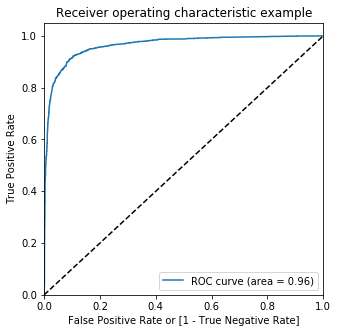

In [336]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)




In [337]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Lead  Lead_Prob  LeadsID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0   0.089950     8425          0    1    0    0    0    0    0    0   
1     0   0.089950     8341          0    1    0    0    0    0    0    0   
2     0   0.016299     7376          0    1    0    0    0    0    0    0   
3     0   0.007702     7414          0    1    0    0    0    0    0    0   
4     1   0.997152     3521          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [338]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.840044  0.963659  0.764915
0.2   0.2  0.884731  0.943609  0.848946
0.3   0.3  0.904627  0.923141  0.893374
0.4   0.4  0.910469  0.900585  0.916476
0.5   0.5  0.910311  0.870510  0.934501
0.6   0.6  0.912206  0.839181  0.956588
0.7   0.7  0.907311  0.803676  0.970297
0.8   0.8  0.888520  0.736842  0.980706
0.9   0.9  0.856150  0.639515  0.987814


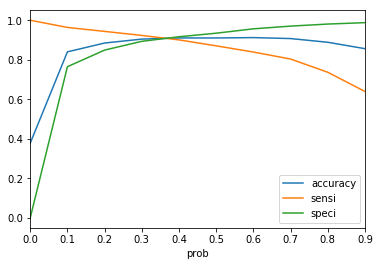

In [339]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [340]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  LeadsID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0   0.089950     8425          0    1    0    0    0    0    0    0   
1     0   0.089950     8341          0    1    0    0    0    0    0    0   
2     0   0.016299     7376          0    1    0    0    0    0    0    0   
3     0   0.007702     7414          0    1    0    0    0    0    0    0   
4     1   0.997152     3521          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

# STEP 10: Assigning the scores 

In [341]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Lead  Lead_Prob  LeadsID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0   0.089950     8425          0    1    0    0    0    0    0    0   
1     0   0.089950     8341          0    1    0    0    0    0    0    0   
2     0   0.016299     7376          0    1    0    0    0    0    0    0   
3     0   0.007702     7414          0    1    0    0    0    0    0    0   
4     1   0.997152     3521          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0                0           9  
1    0    0    0                0           9  
2    0    0    0                0           2  
3    0    0    0                0           1  
4    1    1    1                1         100

# STEP 11: Performing predictions on the test set

In [342]:
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])
X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
4462             0            0    -1.326236                    -1.576510   
5243             0            0    -1.138374                    -1.431150   
4597             0            0    -1.138374                    -1.188282   
4680             0            0    -1.326236                    -1.576510   
5355             0            0    -1.326236                    -1.576510   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
4462             -0.880620                                    0   
5243             -0.878814                                    0   
4597             -0.878814                                    1   
4680             -0.880620                                    0   
5355             -0.880620                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
4462                          0                        0                   0   
5243                          0                        0                   1   
4597                          0                        0                   0   
4680                          1                        0                   0   
5355                          0                        0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4462                       1                           0                   0   
5243                       0                           0                   0   
4597                       0                           0                   0   
4680                       0                           0                   0   
5355                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4462                      0                           0   
5243                      0                           0   
4597                      0                           0   
4680                      0                           0   
5355                      0                           0   

      Lead Source_Social Media  Lead Source_Welingak Website  \
4462                         0                             0   
5243                         0                             0   
4597                         0                             0   
4680                         0                             1   
5355                         0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
4462                            0                                 0   
5243                            0                                 0   
4597                            0                                 0   
4680                            0                                 0   
5355                            0                                 0   

      Last Activity_Email Opened  Last Activity_Email Received  \
4462                           0                             0   
5243                           0                             0   
4597                           1                             0   
4680                           0                             0   
5355                           1                             0   

      Last Activity_Form Submitted on Website  \
4462                                        0   
5243                                        0   
4597                                        0   
4680                                        0   
5355                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
4462                                      0                             0   
5243                                      0                             1   
4597                                      0                             0   
4680       

In [343]:
#Making the columns same the train data
X_test=X_test[col]

In [344]:
#Adding the constants
X_test_sm=sm.add_constant(X_test)

In [345]:
y_test_pred=lm_model.predict(X_test_sm)
y_test_pred=y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([9.73963400e-01, 1.62370915e-05, 9.85834643e-01, 9.94214103e-01,
       1.84325512e-02, 2.24987866e-03, 2.24366740e-03, 9.96155493e-01,
       6.13060663e-05, 5.46357479e-03])

In [346]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
0  0.973963
1  0.000016
2  0.985835
3  0.994214
4  0.018433

In [347]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [348]:
# Putting CustID to index
y_test_df['LeadId'] = y_test_df.index

In [349]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [350]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted  LeadId         0
0          1    4462  0.973963
1          0    5243  0.000016
2          1    4597  0.985835
3          1    4680  0.994214
4          0    5355  0.018433

In [351]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Converted','LeadId','Lead_Prob'], axis=1)
y_pred_final.head()

Converted  LeadId  Lead_Prob
0          1    4462   0.973963
1          0    5243   0.000016
2          1    4597   0.985835
3          1    4680   0.994214
4          0    5355   0.018433

In [352]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

Converted  LeadId  Lead_Prob  final_predicted
0          1    4462   0.973963                1
1          0    5243   0.000016                0
2          1    4597   0.985835                1
3          1    4680   0.994214                1
4          0    5355   0.018433                0

In [353]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9012891344383057

In [354]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1621,   60],
       [ 208,  826]], dtype=int64)

In [355]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [356]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7988394584139265

In [357]:
# Let us calculate specificity
TN / float(TN+FP)

0.9643069601427722

# STEP 12: Assigning the scores to the test data

In [358]:
y_pred_final['Lead_Score'] = y_pred_final.Lead_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Lead  Lead_Prob  LeadsID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     0   0.089950     8425          0    1    0    0    0    0    0    0   
1     0   0.089950     8341          0    1    0    0    0    0    0    0   
2     0   0.016299     7376          0    1    0    0    0    0    0    0   
3     0   0.007702     7414          0    1    0    0    0    0    0    0   
4     1   0.997152     3521          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0                0           9  
1    0    0    0                0           9  
2    0    0    0                0           2  
3    0    0    0                0           1  
4    1    1    1                1         100